In [2]:
%matplotlib inline
import matplotlib as mpl
figure_dir = 'figures'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
import tensorflow as tf
import numpy as np

In [3]:
import tensorflow as tf
import numpy as np

def load_data(fashion = False, digit = None, one_hot = False, normalize = False):
    if fashion:
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    else:
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    if digit is not None and 0 <= digit and digit <= 9:
        train = test = {y: [] for y in range(10)}
        for x, y in zip(x_train, y_train):
            train[y].append(x)
        for x, y in zip(x_test, y_test):
            test[y].append(x)

        for y in range(10):
            train[y] = np.asarray(train[y])
            test[y] = np.asarray(test[y])

        x_train = train[digit]
        x_test = test[digit]
    
    x_train = x_train.reshape((-1, x_train.shape[1] * x_train.shape[2])).astype(np.float32)
    x_test = x_test.reshape((-1, x_test.shape[1] * x_test.shape[2])).astype(np.float32)

    if one_hot:
        y_train_t = np.zeros((y_train.shape[0], 10))
        y_train_t[np.arange(y_train.shape[0]), y_train] = 1
        y_train = y_train_t
        y_test_t = np.zeros((y_test.shape[0], 10))
        y_test_t[np.arange(y_test.shape[0]), y_test] = 1
        y_test = y_test_t
    
    if normalize:
        X = np.concatenate((x_train, x_test))
        X = (X - X.min()) / (X.max() - X.min())
        x_train = X[: len(y_train)]
        x_test = X[len(y_train):]
    
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)
    return (x_train, y_train), (x_test, y_test)

In [4]:
from concrete_estimator import run_experiment
from sklearn.model_selection import train_test_split
def concrete_column_subset_selector_general(train, test, K, model_dir = None):
        
    x_train, x_val, y_train, y_val = train_test_split(train[0], train[1], test_size = 0.1)
    train = (x_train, y_train)
    val = (x_val, y_val)
    
    probabilities = run_experiment('MNIST', train, val, test, K, [320, 320], 800, max(train[0].shape[0] // 256, 16), 0.001, 0.1)
    
    return probabilities

In [4]:
(x_train, y_train), (x_test, y_test) = load_data(fashion = False, digit = None, one_hot = True)
train, test = (x_train, x_train), (x_test, x_test)
probabilities = concrete_column_subset_selector_general(train, test, 20)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
INFO:tensorflow:Using config: {'_model_dir': './concrete_model_dir_MNIST_800_2019-06-09_16.53.07.661446', '_tf_random_seed': None, '_save_summary_steps': 258, '_save_checkpoints_steps': 12900, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  allow_growth: true
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 258, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6e513055c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train 

INFO:tensorflow:global_step/sec: 424.075
INFO:tensorflow:loss = 465766.0, step = 10062 (0.609 sec)
INFO:tensorflow:global_step/sec: 436.525
INFO:tensorflow:loss = 533109.0, step = 10320 (0.591 sec)
INFO:tensorflow:global_step/sec: 411.522
INFO:tensorflow:loss = 1.1844e+06, step = 10578 (0.627 sec)
INFO:tensorflow:global_step/sec: 406.217
INFO:tensorflow:loss = 1.18364e+06, step = 10836 (0.636 sec)
INFO:tensorflow:global_step/sec: 427.745
INFO:tensorflow:loss = 487116.0, step = 11094 (0.603 sec)
INFO:tensorflow:global_step/sec: 436.516
INFO:tensorflow:loss = 337047.0, step = 11352 (0.591 sec)
INFO:tensorflow:global_step/sec: 427.987
INFO:tensorflow:loss = 1.00896e+06, step = 11610 (0.603 sec)
INFO:tensorflow:global_step/sec: 429.965
INFO:tensorflow:loss = 2.69394e+19, step = 11868 (0.600 sec)
INFO:tensorflow:global_step/sec: 407.134
INFO:tensorflow:loss = 455680.0, step = 12126 (0.634 sec)
INFO:tensorflow:global_step/sec: 401.539
INFO:tensorflow:loss = 592135.0, step = 12384 (0.643 sec)

INFO:tensorflow:global_step/sec: 424.171
INFO:tensorflow:loss = 775820.0, step = 26316 (0.608 sec)
INFO:tensorflow:global_step/sec: 426.367
INFO:tensorflow:loss = 1.21021e+06, step = 26574 (0.605 sec)
INFO:tensorflow:global_step/sec: 431.83
INFO:tensorflow:loss = 448266.0, step = 26832 (0.597 sec)
INFO:tensorflow:global_step/sec: 423.804
INFO:tensorflow:loss = 971356.0, step = 27090 (0.609 sec)
INFO:tensorflow:global_step/sec: 398.499
INFO:tensorflow:loss = 2.14726e+06, step = 27348 (0.647 sec)
INFO:tensorflow:global_step/sec: 432.766
INFO:tensorflow:loss = 611327.0, step = 27606 (0.596 sec)
INFO:tensorflow:global_step/sec: 421.12
INFO:tensorflow:loss = 662898.0, step = 27864 (0.612 sec)
INFO:tensorflow:global_step/sec: 438.157
INFO:tensorflow:loss = 1.31079e+06, step = 28122 (0.589 sec)
INFO:tensorflow:global_step/sec: 428.793
INFO:tensorflow:loss = 601880.0, step = 28380 (0.603 sec)
INFO:tensorflow:global_step/sec: 431.613
INFO:tensorflow:loss = 944536.0, step = 28638 (0.596 sec)
INF

INFO:tensorflow:global_step/sec: 428.513
INFO:tensorflow:loss = 2.03739e+06, step = 45408 (0.602 sec)
INFO:tensorflow:global_step/sec: 435.236
INFO:tensorflow:loss = 1.01421e+06, step = 45666 (0.593 sec)
INFO:tensorflow:global_step/sec: 420.063
INFO:tensorflow:loss = 1.64193e+06, step = 45924 (0.615 sec)
INFO:tensorflow:global_step/sec: 402.098
INFO:tensorflow:loss = 929043.0, step = 46182 (0.642 sec)
INFO:tensorflow:global_step/sec: 428.048
INFO:tensorflow:loss = 1.42875e+06, step = 46440 (0.603 sec)
INFO:tensorflow:global_step/sec: 415.236
INFO:tensorflow:loss = 1.61256e+06, step = 46698 (0.621 sec)
INFO:tensorflow:global_step/sec: 428.921
INFO:tensorflow:loss = 1.31804e+06, step = 46956 (0.602 sec)
INFO:tensorflow:global_step/sec: 418.311
INFO:tensorflow:loss = 1.95026e+06, step = 47214 (0.617 sec)
INFO:tensorflow:global_step/sec: 423.483
INFO:tensorflow:loss = 3.81309e+06, step = 47472 (0.609 sec)
INFO:tensorflow:global_step/sec: 405.574
INFO:tensorflow:loss = 1.28956e+06, step = 4

NanLossDuringTrainingError: NaN loss during training.

In [6]:
(x_train, y_train), (x_test, y_test) = load_data(fashion = False, digit = None, one_hot = True)
train, test = (x_train, x_train), (x_test, x_test)
features = []
for i in range(5):
    probabilities = concrete_column_subset_selector_general(train, test, 20)
    features.append(np.argmax(probabilities, axis = 1))

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
INFO:tensorflow:Using config: {'_model_dir': './concrete_model_dir_MNIST_800_2019-06-09_13.56.11.340285', '_tf_random_seed': None, '_save_summary_steps': 258, '_save_checkpoints_steps': 12900, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  allow_growth: true
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 258, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f54be70b5c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train 

KeyboardInterrupt: 

In [15]:
N = len(features)
common = 0
for i in range(N):
    for j in range(i + 1, N):
        a = set(features[i].tolist())
        b = set(features[j].tolist())
        common_ij = len(a.intersection(b))
        print(i, j, common_ij)
        common += common_ij

print(common / (N * (N - 1) / 2 * features[i].size))
print(features[i].size)

0 1 0
0 2 1
0 3 0
0 4 0
1 2 0
1 3 1
1 4 1
2 3 1
2 4 0
3 4 1
0.05
10


In [5]:
import colorsys
 
def HSVToRGB(h, s, v):
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
    return np.asarray([int(255 * r + 0.5), int(255 * g + 0.5), int(255 * b + 0.5)], np.uint8)
 
def getDistinctColors(n):
    huePartition = 1.0 / (n + 1)
    return list([HSVToRGB(huePartition * value, 1.0, 1.0) for value in range(0, n)])

for digit, K in zip([None], [20]):
    
    cluster_size = 3

    (x_train, y_train), (x_test, y_test) = load_data(fashion = False, digit = digit, one_hot = True)
    train, test = (x_train, x_train), (x_test, x_test)
    train_fn = lambda: make_dataset((x_train, x_train), batch_size)
    test_fn = lambda: make_dataset((x_test, x_test), batch_size)

    probabilities = concrete_column_subset_selector_general(train, test, K)
    indices = np.argmax(probabilities, axis = 1)
    print(indices)
    tx_train = x_train[:, indices]
    tx_test = x_test[:, indices]

    ind = np.argpartition(probabilities, -cluster_size)[:, -cluster_size:]
    ind = np.flip(np.asarray([ind_i[np.argsort(probabilities[i, ind_i])] for i, ind_i in enumerate(list(ind))]), 1)
    print(ind)
    
    break

    from concrete_estimator import dataset_input_fn

    batch_size = 256
    hidden_units = [320, 320]
    dropout = 0.1
    learning_rate = 0.001
    epoch_num = 200 * 60000 // x_train.shape[0]

    t_train_fn_repeat = lambda: dataset_input_fn((tx_train, x_train), batch_size, -1)
    t_train_fn = lambda: dataset_input_fn((tx_train, x_train), batch_size, seed = 1)
    t_test_fn = lambda: dataset_input_fn((tx_test, x_test), batch_size, seed = 1)

    feature_columns = [tf.feature_column.numeric_column(key = 'features', shape = [K])]
    regressor = tf.estimator.DNNRegressor(hidden_units = hidden_units, feature_columns = feature_columns, label_dimension = x_train.shape[1], optimizer = tf.train.AdamOptimizer(learning_rate), loss_reduction = tf.losses.Reduction.MEAN, activation_fn = tf.nn.leaky_relu, dropout = dropout)
    regressor.train(input_fn = t_train_fn_repeat, steps = epoch_num * x_train.shape[0] // batch_size)
    eval_result = regressor.evaluate(input_fn = t_test_fn)
    print(eval_result)

    import matplotlib.pyplot as plt
    import imageio
    from os.path import join

    num_images = 5
    start_idx = 0
    start_idx_t = 3
    reconstructions_train = np.asarray([x['predictions'] for x in regressor.predict(input_fn = t_train_fn)])
    reconstructions_test = np.asarray([x['predictions'] for x in regressor.predict(input_fn = t_test_fn)])
    r_imgs = np.concatenate((reconstructions_train[start_idx: start_idx + 2 * num_images], reconstructions_test[start_idx_t: start_idx_t + 3 * num_images]))
    r_imgs = np.reshape(r_imgs, [-1, 28, 28])
    r_imgs = np.clip(r_imgs, 0, 255)

    np.random.seed(seed = 1)
    perm = np.random.permutation(x_train.shape[0])
    imgs = x_train[perm[start_idx: start_idx + 2 * num_images]]
    np.random.seed(seed = 1)
    perm = np.random.permutation(x_test.shape[0])
    imgs1 = x_test[perm[start_idx_t: start_idx_t + 3 * num_images]]
    imgs = np.concatenate((imgs, imgs1))
    imgs = np.reshape(imgs, [-1, 28, 28])
    imgs = np.clip(imgs, 0, 255)

    imgs = imgs.astype(np.uint8)
    r_imgs = r_imgs.astype(np.uint8)

    def subplot(imgs, rows, mask = None):
        if mask is None:
            mask = np.ones_like(imgs[0])
        cols = imgs.shape[0] // rows
        res = np.zeros((imgs.shape[1] * rows, imgs.shape[2] * cols, 3), imgs.dtype)
        for i in range(rows):
            for j in range(cols):
                row = i * imgs.shape[1]
                col = j * imgs.shape[2]
                n = i * cols + j
                def convert_to_C2_C3(img):
                    #zero = np.array([0x2c, 0xa0, 0x2c], np.int32)
                    #one = np.array([0xd6, 0x27, 0x28], np.int32)
                    zero = np.array([0xd0, 0x2a, 0x48], np.int32)
                    one = np.array([0xff, 0xff, 0xff], np.int32)
                    return (zero + np.multiply(img[:, :, None] / 255.0, (one - zero)[None, None, :])).astype(np.uint8)
                tres = convert_to_C2_C3(imgs[n])
                tres = np.where((mask > 0)[None, ..., None], tres, np.zeros_like(tres))
                res[row: row + imgs.shape[1], col: col + imgs.shape[2]] = tres
        return res

    plt.figure(1)
    img = np.zeros([imgs.shape[1] * imgs.shape[2]], np.uint8)
    img[indices] = 255
    img = np.reshape(img, [imgs.shape[1], imgs.shape[2]])
    plt.title('Selected Pixels')
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.savefig(join(figure_dir, 'selected_pixels_' + str(digit) + '.pdf'), transparent = True)
    imageio.imwrite(join(figure_dir, 'selected_pixels_' + str(digit) + '.png'), img)

    plt.figure(2)
    plt.title('Input Images')
    plt.axis('off')
    temp = subplot(imgs, num_images)
    plt.imshow(temp, cmap = 'gray')
    plt.savefig(join(figure_dir, 'input_images_' + str(digit) + '.pdf'), transparent = True)
    imageio.imwrite(join(figure_dir, 'input_images_' + str(digit) + '.png'), temp)

    plt.figure(3)
    plt.title('Masked Images')
    plt.axis('off')
    temp = subplot(imgs, num_images, img)
    plt.imshow(temp, cmap = 'gray')
    plt.savefig(join(figure_dir, 'masked_images_' + str(digit) + '.pdf'), transparent = True)
    imageio.imwrite(join(figure_dir, 'masked_images_' + str(digit) + '.png'), temp)

    plt.figure(4)
    plt.title('Reconstructed Images')
    plt.axis('off')
    temp = subplot(r_imgs, num_images)
    plt.imshow(temp, cmap = 'gray')
    plt.savefig(join(figure_dir, 'reconstructed_images_' + str(digit) + '.pdf'), transparent = True)
    imageio.imwrite(join(figure_dir, 'reconstructed_images_' + str(digit) + '.png'), temp)

    plt.figure(5)
    img = np.zeros([imgs.shape[1] * imgs.shape[2], 3], np.uint8)
    colors = getDistinctColors(len(indices))
    for c, i in zip(colors, ind):
        img[i] = c
    img = np.reshape(img, [imgs.shape[1], imgs.shape[2], 3])
    plt.title('Selected Pixel Groups')
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.savefig(join(figure_dir, 'selected_pixel_groups_' + str(digit) + '.pdf'), transparent = True)
    imageio.imwrite(join(figure_dir, 'selected_pixel_groups_' + str(digit) + '.png'), img)

    plt.show()

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
INFO:tensorflow:Using config: {'_model_dir': './concrete_model_dir_MNIST_800_2019-06-09_17.49.56.201270', '_tf_random_seed': None, '_save_summary_steps': 258, '_save_checkpoints_steps': 12900, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  allow_growth: true
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 258, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe3afe8c550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train 

INFO:tensorflow:loss = 1898.59, step = 10062 (0.636 sec)
INFO:tensorflow:global_step/sec: 414.533
INFO:tensorflow:loss = 1931.88, step = 10320 (0.622 sec)
INFO:tensorflow:global_step/sec: 404.143
INFO:tensorflow:loss = 1833.54, step = 10578 (0.638 sec)
INFO:tensorflow:global_step/sec: 410.486
INFO:tensorflow:loss = 1813.58, step = 10836 (0.629 sec)
INFO:tensorflow:global_step/sec: 400.484
INFO:tensorflow:loss = 1733.38, step = 11094 (0.644 sec)
INFO:tensorflow:global_step/sec: 407.497
INFO:tensorflow:loss = 1844.21, step = 11352 (0.633 sec)
INFO:tensorflow:global_step/sec: 408.406
INFO:tensorflow:loss = 1860.92, step = 11610 (0.632 sec)
INFO:tensorflow:global_step/sec: 409.607
INFO:tensorflow:loss = 1735.49, step = 11868 (0.630 sec)
INFO:tensorflow:global_step/sec: 402.43
INFO:tensorflow:loss = 1786.3, step = 12126 (0.641 sec)
INFO:tensorflow:global_step/sec: 406.43
INFO:tensorflow:loss = 1717.56, step = 12384 (0.635 sec)
INFO:tensorflow:global_step/sec: 406.753
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 1273.56, step = 26574 (0.638 sec)
INFO:tensorflow:global_step/sec: 415.773
INFO:tensorflow:loss = 1285.02, step = 26832 (0.620 sec)
INFO:tensorflow:global_step/sec: 402.883
INFO:tensorflow:loss = 1354.84, step = 27090 (0.640 sec)
INFO:tensorflow:global_step/sec: 415.607
INFO:tensorflow:loss = 1294.48, step = 27348 (0.621 sec)
INFO:tensorflow:global_step/sec: 406.493
INFO:tensorflow:loss = 1267.86, step = 27606 (0.635 sec)
INFO:tensorflow:global_step/sec: 408.929
INFO:tensorflow:loss = 1247.83, step = 27864 (0.631 sec)
INFO:tensorflow:global_step/sec: 406.623
INFO:tensorflow:loss = 1301.1, step = 28122 (0.635 sec)
INFO:tensorflow:global_step/sec: 406.537
INFO:tensorflow:loss = 1301.63, step = 28380 (0.635 sec)
INFO:tensorflow:global_step/sec: 408.003
INFO:tensorflow:loss = 1462.86, step = 28638 (0.633 sec)
INFO:tensorflow:global_step/sec: 396.784
INFO:tensorflow:loss = 1373.7, step = 28896 (0.650 sec)
INFO:tensorflow:global_step/sec: 406.223
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 415.432
INFO:tensorflow:loss = 1515.66, step = 46182 (0.621 sec)
INFO:tensorflow:global_step/sec: 416.105
INFO:tensorflow:loss = 1382.37, step = 46440 (0.620 sec)
INFO:tensorflow:global_step/sec: 412.03
INFO:tensorflow:loss = 1470.39, step = 46698 (0.626 sec)
INFO:tensorflow:global_step/sec: 415.3
INFO:tensorflow:loss = 1439.29, step = 46956 (0.621 sec)
INFO:tensorflow:global_step/sec: 413.501
INFO:tensorflow:loss = 1427.97, step = 47214 (0.624 sec)
INFO:tensorflow:global_step/sec: 410.262
INFO:tensorflow:loss = 1568.26, step = 47472 (0.629 sec)
INFO:tensorflow:global_step/sec: 420.204
INFO:tensorflow:loss = 1715.67, step = 47730 (0.614 sec)
INFO:tensorflow:global_step/sec: 403.417
INFO:tensorflow:loss = 1436.56, step = 47988 (0.640 sec)
INFO:tensorflow:global_step/sec: 409.68
INFO:tensorflow:loss = 1630.01, step = 48246 (0.630 sec)
INFO:tensorflow:global_step/sec: 409.7
INFO:tensorflow:loss = 1518.43, step = 48504 (0.630 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-10T00:52:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./concrete_model_dir_MNIST_800_2019-06-09_17.49.56.201270/model.ckpt-64500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-10-00:52:40
INFO:tensorflow:Saving dict for global step 64500: global_step = 64500, loss = 4488.9, prediction_mse = 2174.01
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 64500: ./concrete_model_dir_MNIST_800_2019-06-09_17.49.56.201270/model.ckpt-64500
INFO:tensorflow:global_step/sec: 167.391
INFO:tensorflow:loss = 1808.34, step = 64500 (1.541 sec)
INFO:tensorflow:global_step/sec: 416.229
INFO:tensorflow:loss = 1507.67, step = 64758 (0.620 sec)
INFO:tensorflow:global_step/sec: 403.585
INFO:tensorflow:loss = 1700.83, step = 65016 (0.639 sec)
INFO:tensorflow:global_step/sec: 410.767
INFO:tensor

INFO:tensorflow:global_step/sec: 403.329
INFO:tensorflow:loss = 1658.7, step = 82302 (0.640 sec)
INFO:tensorflow:global_step/sec: 399.78
INFO:tensorflow:loss = 1648.99, step = 82560 (0.645 sec)
INFO:tensorflow:global_step/sec: 400.108
INFO:tensorflow:loss = 1570.9, step = 82818 (0.645 sec)
INFO:tensorflow:global_step/sec: 416.321
INFO:tensorflow:loss = 1714.15, step = 83076 (0.619 sec)
INFO:tensorflow:global_step/sec: 404.649
INFO:tensorflow:loss = 1721.39, step = 83334 (0.638 sec)
INFO:tensorflow:global_step/sec: 419.254
INFO:tensorflow:loss = 1583.42, step = 83592 (0.616 sec)
INFO:tensorflow:global_step/sec: 410.476
INFO:tensorflow:loss = 1735.9, step = 83850 (0.629 sec)
INFO:tensorflow:global_step/sec: 408.697
INFO:tensorflow:loss = 1662.05, step = 84108 (0.631 sec)
INFO:tensorflow:global_step/sec: 417.108
INFO:tensorflow:loss = 1675.4, step = 84366 (0.619 sec)
INFO:tensorflow:global_step/sec: 403.943
INFO:tensorflow:loss = 1686.0, step = 84624 (0.639 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 416.086
INFO:tensorflow:loss = 1608.0, step = 101910 (0.620 sec)
INFO:tensorflow:global_step/sec: 402.149
INFO:tensorflow:loss = 1696.65, step = 102168 (0.642 sec)
INFO:tensorflow:global_step/sec: 407.223
INFO:tensorflow:loss = 1722.75, step = 102426 (0.633 sec)
INFO:tensorflow:global_step/sec: 402.281
INFO:tensorflow:loss = 1658.99, step = 102684 (0.641 sec)
INFO:tensorflow:global_step/sec: 411.831
INFO:tensorflow:loss = 1698.11, step = 102942 (0.627 sec)
INFO:tensorflow:Saving checkpoints for 103200 into ./concrete_model_dir_MNIST_800_2019-06-09_17.49.56.201270/model.ckpt.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-10T00:54:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./concrete_model_dir_MNIST_800_2019-06-09_17.49.56.201270/model.ckpt-103200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflo

INFO:tensorflow:global_step/sec: 414.238
INFO:tensorflow:loss = 1621.49, step = 119196 (0.623 sec)
INFO:tensorflow:global_step/sec: 415.217
INFO:tensorflow:loss = 1606.54, step = 119454 (0.622 sec)
INFO:tensorflow:global_step/sec: 417.266
INFO:tensorflow:loss = 1592.48, step = 119712 (0.618 sec)
INFO:tensorflow:global_step/sec: 415.457
INFO:tensorflow:loss = 1635.59, step = 119970 (0.621 sec)
INFO:tensorflow:global_step/sec: 403.74
INFO:tensorflow:loss = 1704.59, step = 120228 (0.639 sec)
INFO:tensorflow:global_step/sec: 410.93
INFO:tensorflow:loss = 1649.71, step = 120486 (0.628 sec)
INFO:tensorflow:global_step/sec: 408.722
INFO:tensorflow:loss = 1712.87, step = 120744 (0.631 sec)
INFO:tensorflow:global_step/sec: 417.63
INFO:tensorflow:loss = 1669.16, step = 121002 (0.617 sec)
INFO:tensorflow:global_step/sec: 404.331
INFO:tensorflow:loss = 1633.87, step = 121260 (0.638 sec)
INFO:tensorflow:global_step/sec: 410.047
INFO:tensorflow:loss = 1609.84, step = 121518 (0.629 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 411.415
INFO:tensorflow:loss = 1721.51, step = 138546 (0.627 sec)
INFO:tensorflow:global_step/sec: 417.747
INFO:tensorflow:loss = 1537.79, step = 138804 (0.618 sec)
INFO:tensorflow:global_step/sec: 410.813
INFO:tensorflow:loss = 1589.2, step = 139062 (0.628 sec)
INFO:tensorflow:global_step/sec: 409.496
INFO:tensorflow:loss = 1687.99, step = 139320 (0.630 sec)
INFO:tensorflow:global_step/sec: 400.852
INFO:tensorflow:loss = 1619.64, step = 139578 (0.643 sec)
INFO:tensorflow:global_step/sec: 418.71
INFO:tensorflow:loss = 1622.39, step = 139836 (0.616 sec)
INFO:tensorflow:global_step/sec: 405.861
INFO:tensorflow:loss = 1667.8, step = 140094 (0.636 sec)
INFO:tensorflow:global_step/sec: 410.71
INFO:tensorflow:loss = 1684.27, step = 140352 (0.628 sec)
INFO:tensorflow:global_step/sec: 400.055
INFO:tensorflow:loss = 1768.97, step = 140610 (0.645 sec)
INFO:tensorflow:global_step/sec: 408.61
INFO:tensorflow:loss = 1578.58, step = 140868 (0.631 sec)
INFO:tensorflow

In [10]:
import numpy as np
import tensorflow as tf
import random
import time

def next_batch(data, labels, batch_size):
	perm = np.random.permutation(len(data))
	for i in range(0, len(data), batch_size):
		indices = perm[i: i + batch_size]
		yield data[indices], labels[indices]
        
def make_dataset(data, batch_size):
	X, Y = data
	with tf.device('/CPU:0'):
		dataset = tf.data.Dataset.from_generator(lambda: next_batch(data = X, labels = Y, batch_size = batch_size), (tf.float32, tf.float32), (tf.TensorShape([None, X.shape[1]]), tf.TensorShape([None, Y.shape[1]])))
		dataset = dataset.prefetch(1)
		return dataset

def iterator4estimator(dataset):
	features, labels = dataset.make_one_shot_iterator().get_next()
	return {'features': features}, labels

def linear_combination(X):
	return tf.einsum('ikj->ik', X)

def custom_combination(X):
	X = tf.layers.dense(X, 1)
	return tf.squeeze(X, axis = -1)

def custom_combination2(X):
	X = tf.layers.dense(X, X.shape[2] // 2)
	X = tf.layers.dense(X, 1)
	return tf.squeeze(X, axis = -1)

def concrete_select(X, units, temp, training, f = linear_combination): # f takes in ikj, returns ik
	# logits is defined as log probabilities
	logits = tf.get_variable('logits', (units, X.shape[1]))
	def samples():
		uniform = tf.random_uniform(shape = tf.shape(logits), minval = np.finfo(tf.float32.as_numpy_dtype).tiny, maxval = 1.0)
		gumbel = -tf.log(-tf.log(uniform))
		noisy_logits = (logits + gumbel) / temp
		samples = tf.nn.softmax(noisy_logits)
		return samples
	
	def discrete_logits():
		discrete_logits = tf.one_hot(tf.argmax(logits, axis = 1), X.shape[1])
		return discrete_logits
	
	samples = tf.cond(training, samples, discrete_logits)
	X = tf.einsum('ij,kj->ik', X, samples)
	#X = tf.einsum('ij,kj->ikj', X, samples) # i #instances, k #hidden units, j #features
	#X = f(X)
	return X

def autoencoder(X, units, O, temp, training, complexity = 128, drop_rate = 0.5, concrete = True, f = linear_combination):
	if concrete:
		X = concrete_select(X, units, temp, training, f = f)
	else:
		X = tf.layers.dense(X, units, use_bias = False)
	# Selected features of X
	X = tf.layers.dense(X, complexity, tf.nn.leaky_relu)
	X = tf.layers.dropout(X, rate = drop_rate, training = training)
	X = tf.layers.dense(X, complexity, tf.nn.leaky_relu)
	X = tf.layers.dropout(X, rate = drop_rate, training = training)
	X = tf.layers.dense(X, O)
	return X

def concrete_column_subset_selector(train_fn, val_fn, K, test_fn = None, complexity = 200, drop_rate = 0.5, epoch_num = 400, learning_rate = 0.001, concrete = True, f = linear_combination, start_temp = 10.0, end_temp = 0.02, debug = False, print_each_kth = 50):
	tf.reset_default_graph()
	
	train = train_fn()
	val = val_fn()
	test = test_fn()
	
	D = train.output_shapes[0][1]
	O = train.output_shapes[1][1]
	if debug:
		print(D, O)

	cluster_size = 5
	temp = start_temp
	temp_decay_rate = np.exp(np.log(end_temp / start_temp) / epoch_num)
	
	training = tf.placeholder(tf.bool, ())
	iterator = tf.data.Iterator.from_structure(train.output_types, train.output_shapes)
	next_batch = iterator.get_next()
	X = next_batch[0]
	TY = next_batch[1]
	BATCH_SIZE = tf.shape(X)[0]
	TEMP = tf.placeholder(tf.float32, ())
	Y = autoencoder(X, K, O, TEMP, training, complexity, drop_rate, concrete, f)
	#print(*[var.name for var in tf.trainable_variables()], sep = '\n')
	
	logits = [var for var in tf.trainable_variables() if var.name == 'logits:0'][0]
	n_logits = tf.nn.softmax(logits)
	
	tf.losses.mean_squared_error(TY, Y)
	loss = tf.losses.get_total_loss(add_regularization_losses = False)
	with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
		train_op = tf.train.AdamOptimizer(learning_rate).minimize(tf.losses.get_total_loss())
	
	init = tf.global_variables_initializer()
	
	train_init_op = iterator.make_initializer(train)
	val_init_op = iterator.make_initializer(val)
	if test:
		test_init_op = iterator.make_initializer(test)
	
	np.set_printoptions(precision = 3)
	
	gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 1.0, allow_growth = True)
	with tf.Session(config = tf.ConfigProto(log_device_placement=True, gpu_options = gpu_options)) as sess:
		sess.run(init)
		for ep in range(epoch_num):
			start = time.time()
			temp *= temp_decay_rate
			cost = 0
			try:
				sess.run(train_init_op)
				samples = 0
				while True:
					_, c, p, batch_size = sess.run([train_op, loss, n_logits, BATCH_SIZE], feed_dict = {TEMP: temp, training: True})
					cost += c * batch_size
					samples += batch_size
			except tf.errors.OutOfRangeError:
				cost /= samples
			mseT = 0
			try:
				sess.run(val_init_op)
				samples = 0
				while True:
					cT, batch_size = sess.run([loss, BATCH_SIZE], feed_dict = {TEMP: temp, training: True})
					mseT += cT * batch_size
					samples += batch_size
			except tf.errors.OutOfRangeError:
				mseT /= samples
			mse = 0
			try:
				sess.run(val_init_op)
				samples = 0
				while True:
					c, batch_size = sess.run([loss, BATCH_SIZE], feed_dict = {TEMP: temp, training: False})
					mse += c * batch_size
					samples += batch_size
			except tf.errors.OutOfRangeError:
				mse /= samples
			
			ind = np.argpartition(p, -cluster_size)[:, -cluster_size:]
			ind = np.flip(np.asarray([ind_i[np.argsort(p[i, ind_i])] for i, ind_i in enumerate(list(ind))]), 1)
			if debug:
				print('Epoch {}: MSE = {:.5f}, MSE_valT = {:.5f}, MSE_val = {:.5f}, temp = {:.3f} took {:.2f}s'.format(ep, cost, mseT, mse, temp, time.time() - start))
			
				if ep % print_each_kth == print_each_kth - 1:
					for i, ind_i in enumerate(list(ind)):
						print(ind_i, p[i, ind_i])
					print(np.mean(p[np.arange(ind.shape[0]), ind[:, 0]]))
		if test:
			mse = 0
			try:
				sess.run(test_init_op)
				samples = 0
				while True:
					c, batch_size = sess.run([loss, BATCH_SIZE], feed_dict = {TEMP: temp, training: False})
					mse += c * batch_size
					samples += batch_size
			except tf.errors.OutOfRangeError:
				mse /= samples
			print('MSE = {:.5f}'.format(mse))
	
	return list([ind_i[0] for ind_i in list(ind)]), mse

In [64]:
train, test = load_mice()
concrete_column_subset_selector_general((train[0], train[0]), (test[0], test[0]), 10, './mice_model_dir')

INFO:tensorflow:Using config: {'_model_dir': './mice_model_dir', '_tf_random_seed': None, '_save_summary_steps': 49, '_save_checkpoints_steps': 2450, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 49, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f58593c7518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The eval

(array([[ 1.8354506 ,  0.07399186, -0.74275047, ...,  0.07399186,
          0.9066981 ,  0.95256996],
        [-0.34893027,  0.07404803, -0.62202734, ...,  0.07404803,
          0.67309135,  0.44376823],
        [ 0.00761588,  0.07352801,  0.49532396, ...,  0.07352801,
         -0.20202778, -1.2295446 ],
        ...,
        [-0.2176048 ,  0.07404983, -0.20848542, ...,  0.07404983,
          1.1435897 ,  0.7696463 ],
        [ 1.4564214 ,  0.07410247,  0.02929649, ...,  0.07410247,
         -0.5170718 ,  0.28651065],
        [-0.838462  ,  0.07393703, -0.8441774 , ...,  0.07393703,
          0.3668642 ,  1.4153534 ]], dtype=float32),
 array([[ 1.4671649 ,  0.07428528,  0.87766474, ...,  0.07428528,
         -0.24327566, -1.0652703 ],
        [-0.617009  ,  0.0735561 ,  0.97694683, ...,  0.0735561 ,
         -1.2551023 , -0.37254086],
        [ 1.2055055 ,  0.0743174 , -0.12988292, ...,  0.0743174 ,
          1.8246627 , -0.00424654],
        ...,
        [-0.85608083,  0.07402298, -0.8

In [65]:
from sklearn.decomposition import PCA
def pca_extractor(train, test, K):
    pca = PCA(n_components = K)
    pca.fit(train[0])
    tx_train = pca.transform(train[0])
    tx_test = pca.transform(test[0])
    return tx_train, tx_test

In [ ]:
def autoencoder_model_fn(features, labels, mode, params):
    inputs = tf.feature_column.input_layer(features, params['feature_columns'])
    
    hidden_units = inputs
    for units in params['num_features']:
        hidden_units = tf.layers.dense(hidden_units, units, )
    
    outputs = hidden_units
    for units in params['hidden_units']:
        outputs = 

In [66]:
from skfeature.function.sparse_learning_based.UDFS import udfs
from skfeature.function.sparse_learning_based.MCFS import mcfs
from skfeature.function.sparse_learning_based.MCFS import feature_ranking as mcfs_ranking
from skfeature.utility.sparse_learning import feature_ranking

def mse_check(train, test):
    LR = LinearRegression(n_jobs = -1)
    LR.fit(train[0], train[1])
    MSELR = ((LR.predict(test[0]) - test[1]) ** 2).mean()
    return MSELR

def udfs_ours(train, test, K, debug = False):
    x_train, x_val, y_train, y_val = train_test_split(train[0], train[1], test_size = 0.1)
    bindices = []
    bmse = 1e100
    for gamma in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
        W = udfs(x_train, verbose = debug, gamma = gamma, max_iter = 100)
        indices = feature_ranking(W)[: K]
        mse = mse_check((train[0][:, indices], train[1]), (x_val[:, indices], y_val))
        if bmse > mse:
            bmse = mse
            bindices = indices
    if debug:
        print(bindices, bmse)
    return train[0][:, bindices], test[0][:, bindices]

def mcfs_ours(train, test, K, debug = False):
    W = MCFS.mcfs(train[0], n_selected_features = K, verbose = debug, gamma = gamma, max_iter = 100)
    bindices = mcfs_ranking(W)[: K]
    if debug:
        print(bindices)
    return train[0][:, bindices], test[0][:, bindices]

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def eval_on_dataset(train, test, feature_sizes, debug = False):
    n_clusters = len(np.unique(train[1]))
    
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

    params = {'legend.fontsize': 'x-small',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'large',
             'axes.titlesize':'large',
             'xtick.labelsize':'large',
             'ytick.labelsize':'large'}
    plt.rcParams.update(params)

    # algorithms = [pfa_selector, column_subset_selector, pca_subset_selector, random_selector, concrete_selector_unsupervised]
    algorithms = [pca_extractor, concrete_column_subset_selector_general, udfs_ours, mcfs_ours, pfa_transform, random_transform]
    
    #selected_indices = []
    for alg, c in zip(algorithms, colors):
        nmi_results = {}
        acc_results = {}
        mseLR_results = {}
        class_results = {}
        class_results_DT = {}
        #all_indices = {}
        for k in feature_sizes:
            print('k = {}, algorithm = {}'.format(k, alg.__name__))
            #indices = alg(x_train, enc.transform(y_train.reshape((-1, 1))).toarray(), k)
            tx_train, tx_test = alg((train[0], train[0]), (test[0], test[0]), k)
            #all_indices[k] = indices
            mseLR, acc, acc_DT, cnmi, cacc = eval_subset((tx_train, train[1]), (tx_test, test[1]))
            mseLR_results[k] = mseLR
            class_results[k] = acc
            class_results_DT[k] = acc_DT
            nmi_results[k] = cnmi
            acc_results[k] = cacc
        #selected_indices.append((alg.__name__, all_indices))
        metrics = [nmi_results, acc_results, mseLR_results, class_results, class_results_DT]
        metric_names = ['NMI', 'ACC', 'MSELR', 'CLASS', 'CLASSDT']
        for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
            plt.figure(i + 1, figsize = [12, 8])
            ax = plt.plot(metric.keys(), metric.values(), c + '-o', label = alg.__name__)
            pickle.dump(ax, open(str(datetime.datetime.now()).replace(' ', '_').replace(':', '.') + str(k) + alg.__name__ + metric_name + ".pickle", "wb"))  

    plt.figure(1, figsize = [12, 8])
    plt.legend(loc = 'best')
    plt.xlabel('# Features selected')
    plt.ylabel('NMI score')
    plt.savefig(join(figure_dir, datetime.datetime.now().__str__() + 'NMI.pdf'), transparent = True)
    plt.figure(2, figsize = [12, 8])
    plt.legend(loc = 'best')
    plt.xlabel('# Features selected')
    plt.ylabel('ACC score')
    plt.savefig(join(figure_dir, datetime.datetime.now().__str__() + 'ACC.pdf'), transparent = True)
    plt.figure(3, figsize = [12, 8])
    plt.legend(loc = 'best')
    plt.xlabel('# Features selected')
    plt.ylabel('MSELR score')
    plt.savefig(join(figure_dir, datetime.datetime.now().__str__() + 'MSELR.pdf'), transparent = True)
    plt.figure(4, figsize = [12, 8])
    plt.legend(loc = 'best')
    plt.xlabel('# Features selected')
    plt.ylabel('Classification accuracy')
    plt.savefig(join(figure_dir, datetime.datetime.now().__str__() + 'class.pdf'), transparent = True)
    plt.figure(5, figsize = [12, 8])
    plt.legend(loc = 'best')
    plt.xlabel('# Features selected')
    plt.ylabel('Classification accuracy DT')
    plt.savefig(join(figure_dir, datetime.datetime.now().__str__() + 'classDT.pdf'), transparent = True)
    plt.show()

In [ ]:
train, test = load_mice()
eval_on_dataset(train, test, [5, 10, 15, 20, 25, 30], True)

k = 5, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.278, acc = 0.349
acc = 0.347, DTacc = 0.810, MSELR = 3.832
k = 10, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.330, acc = 0.369
acc = 0.354, DTacc = 0.958, MSELR = 2.966
k = 15, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.327, acc = 0.370
acc = 0.375, DTacc = 0.991, MSELR = 2.655
k = 20, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.329, acc = 0.368
acc = 0.344, DTacc = 0.995, MSELR = 2.321
k = 25, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.331, acc = 0.375
acc = 0.394, DTacc = 0.995, MSELR = 2.131
k = 30, algorithm = pca_extractor


/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI wi

nmi = 0.322, acc = 0.358
acc = 0.384, DTacc = 0.991, MSELR = 2.034
k = 5, algorithm = concrete_column_subset_selector_general
INFO:tensorflow:Using config: {'_model_dir': '156090', '_tf_random_seed': None, '_save_summary_steps': 49, '_save_checkpoints_steps': 2450, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 49, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5bb6f529b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflo

/home/fatih/miniconda3/envs/mfb/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 156090/model.ckpt.
INFO:tensorflow:loss = 15.684727, step = 0
INFO:tensorflow:global_step/sec: 26.786
INFO:tensorflow:loss = 12.038363, step = 49 (1.830 sec)
INFO:tensorflow:global_step/sec: 78.0815
INFO:tensorflow:loss = 9.259092, step = 98 (0.627 sec)
INFO:tensorflow:global_step/sec: 82.556
INFO:tensorflow:loss = 11.49902, step = 147 (0.594 sec)
INFO:tensorflow:global_step/sec: 78.8748
INFO:tensorflow:loss = 20.070152, step = 196 (0.621 sec)
INFO:tensorflow:global_step/sec: 79.6573
INFO:tensorflow:loss = 9.631926, step = 245 (0.615 sec)
INFO:tensorflow:global_step/sec: 78.4486
INFO:tensorflow:loss = 10.381262, step = 294 (0.624 sec)
INFO:tensorflow:global_step/sec: 80.2939
INFO:tensorflow:loss = 9.415816, step = 343 (0.610 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 75.9748
INFO:tensorflow:loss = 8.734932, step = 3479 (0.645 sec)
INFO:tensorflow:global_step/sec: 74.6133
INFO:tensorflow:loss = 10.705187, step = 3528 (0.657 sec)
INFO:tensorflow:global_step/sec: 76.2891
INFO:tensorflow:loss = 16.152962, step = 3577 (0.642 sec)
INFO:tensorflow:global_step/sec: 80.0776
INFO:tensorflow:loss = 11.889856, step = 3626 (0.612 sec)
INFO:tensorflow:global_step/sec: 77.6604
INFO:tensorflow:loss = 9.555134, step = 3675 (0.631 sec)
INFO:tensorflow:global_step/sec: 80.7154
INFO:tensorflow:loss = 8.875078, step = 3724 (0.607 sec)
INFO:tensorflow:global_step/sec: 84.3909
INFO:tensorflow:loss = 10.9376955, step = 3773 (0.581 sec)
INFO:tensorflow:global_step/sec: 77.9121
INFO:tensorflow:loss = 9.440507, step = 3822 (0.629 sec)
INFO:tensorflow:global_step/sec: 78.8578
INFO:tensorflow:loss = 12.060651, step = 3871 (0.621 sec)
INFO:tensorflow:global_step/sec: 77.6952
INFO:tensorflow:loss = 8.563527, step = 3920 (0.631 sec)
INFO:tensorflo

INFO:tensorflow:loss = 10.812611, step = 7007 (0.650 sec)
INFO:tensorflow:global_step/sec: 80.5737
INFO:tensorflow:loss = 11.946056, step = 7056 (0.608 sec)
INFO:tensorflow:global_step/sec: 80.7169
INFO:tensorflow:loss = 7.101671, step = 7105 (0.607 sec)
INFO:tensorflow:global_step/sec: 88.3466
INFO:tensorflow:loss = 9.330674, step = 7154 (0.555 sec)
INFO:tensorflow:global_step/sec: 83.1179
INFO:tensorflow:loss = 7.9649715, step = 7203 (0.590 sec)
INFO:tensorflow:global_step/sec: 81.3791
INFO:tensorflow:loss = 13.027046, step = 7252 (0.601 sec)
INFO:tensorflow:global_step/sec: 79.918
INFO:tensorflow:loss = 10.406607, step = 7301 (0.614 sec)
INFO:tensorflow:Saving checkpoints for 7350 into 156090/model.ckpt.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-28-23:58:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 156090/model.ckpt-7350
INFO:tensorflow:Running local_init_op.
INFO:tenso

INFO:tensorflow:global_step/sec: 78.7021
INFO:tensorflow:loss = 19.122608, step = 10045 (0.623 sec)
INFO:tensorflow:global_step/sec: 73.7823
INFO:tensorflow:loss = 8.289853, step = 10094 (0.664 sec)
INFO:tensorflow:global_step/sec: 81.0301
INFO:tensorflow:loss = 9.681756, step = 10143 (0.605 sec)
INFO:tensorflow:global_step/sec: 82.077
INFO:tensorflow:loss = 17.207075, step = 10192 (0.597 sec)
INFO:tensorflow:global_step/sec: 75.9889
INFO:tensorflow:loss = 8.619845, step = 10241 (0.645 sec)
INFO:tensorflow:global_step/sec: 81.3996
INFO:tensorflow:loss = 9.015819, step = 10290 (0.602 sec)
INFO:tensorflow:global_step/sec: 79.636
INFO:tensorflow:loss = 9.154621, step = 10339 (0.615 sec)
INFO:tensorflow:global_step/sec: 80.586
INFO:tensorflow:loss = 22.773722, step = 10388 (0.608 sec)
INFO:tensorflow:global_step/sec: 78.1649
INFO:tensorflow:loss = 8.699003, step = 10437 (0.627 sec)
INFO:tensorflow:global_step/sec: 80.3809
INFO:tensorflow:loss = 10.310784, step = 10486 (0.609 sec)
INFO:tens

In [34]:
decoder((x_train, x_train), (x_test, x_test), (x_test, x_test), K, complexity, dropout, learning_rate, batch_size, epoch_num)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpne57ix11', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f873c5418d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


TypeError: unsupported operand type(s) for -: 'int' and '_ListWrapper'

In [ ]:
def run_on_mnist(fashion = False, digit = None, K = 10, cluster_size = 1, epoch_num = 300, start_temp = 10, end_temp = 0.02, f = linear_combination):

    (x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, digit = digit, one_hot = True)

    input_shape = x_train.shape[1]

    D = input_shape
    learning_rate = 0.00146
    temp = start_temp
    temp_decay_rate = np.exp(np.log(end_temp / start_temp) / epoch_num)

    tf.reset_default_graph()

    training = tf.placeholder(tf.bool, ())
    X = tf.placeholder(tf.float32, (None, D))
    TY = tf.placeholder(tf.float32, (None, D))
    TEMP = tf.placeholder(tf.float32, ())
    Y = autoencoder(X, K, D, TEMP, training, f)
    #print(*[var.name for var in tf.trainable_variables()], sep = '\n')

    logits = [var for var in tf.trainable_variables() if var.name == 'logits:0' or var.name == 'logits/kernel:0'][0]
    n_logits = tf.nn.softmax(logits)

    tf.losses.mean_squared_error(TY, Y)
    loss = tf.losses.get_total_loss(add_regularization_losses = False)
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(tf.losses.get_total_loss())

    init = tf.global_variables_initializer()

    batch_size = 2 ** 8
    batch_per_epoch = x_train.shape[0] // batch_size
    print_each_kth = 30
    
    np.set_printoptions(precision = 3)
    
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333, allow_growth = True)
    with tf.Session(config = tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True)) as sess:
        sess.run(init)
        for ep in range(epoch_num):
            start = time.time()
            temp *= temp_decay_rate
            cost = 0
            for batch_n in range(0, x_train.shape[0], batch_size):
                imgs, _ = next_batch(x_train, y_train, batch_size)
                _, c, p = sess.run([train_op, loss, n_logits], feed_dict = {X: imgs, TY: imgs, TEMP: temp, training: True})
                cost += c / batch_per_epoch
            ind = np.argpartition(p, -cluster_size)[:, -cluster_size:]
            ind = np.flip(np.asarray([ind_i[np.argsort(p[i, ind_i])] for i, ind_i in enumerate(list(ind))]), 1)
            print('Epoch {}: MSE = {:.5f}, temp = {:.3f} took {:.2f}s'.format(ep, cost, temp, time.time() - start))

            if ep % print_each_kth == print_each_kth - 1:
                for i, ind_i in enumerate(list(ind)):
                    print(ind_i, p[i, ind_i])
                imgs, _ = next_batch(x_train, y_train, 30)
                imgs1, _ = next_batch(x_test, y_test, 20)
                imgs = np.concatenate((imgs, imgs1))
                r_imgs = sess.run([Y], feed_dict = {X: imgs, TEMP: temp, training: False})[0]
                imgs = imgs.reshape((-1, 28, 28, 1))
                r_imgs = r_imgs.reshape((-1, 28, 28, 1))

                plt.figure(1)
                plt.title('Reconstructed Images')
                for i in range(50):
                    plt.subplot(5, 10, i + 1)
                    plt.imshow(r_imgs[i, ..., 0], cmap = 'gray')
                plt.figure(2)
                plt.title('Input Images')
                for i in range(50):
                    plt.subplot(5, 10, i + 1)
                    plt.imshow(imgs[i, ..., 0], cmap = 'gray')
                plt.show()
                plt.figure(2)
                colors = getDistinctColors(p.shape[0])
                img = np.zeros((imgs.shape[1], imgs.shape[2], 3), np.uint8)
                for i, ind_i in enumerate(list(ind)):
                    img[ind_i // img.shape[0], ind_i % img.shape[0]] = colors[i]
                plt.imshow(img)
                plt.show()
        cost = 0
        for batch_n in range(0, x_test.shape[0], batch_size):
            x = x_test[batch_n: batch_n + batch_size]
            c = sess.run(loss, feed_dict = {X: x, TY: x, TEMP: temp, training: False})
            cost += c * x.shape[0] / x_test.shape[0]
        print('MSE = {:.5f}'.format(cost))

    return cost

In [69]:
import numpy as np
from scipy.linalg import qr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


def column_subset_selector(A, k):
  eps = 1e-6
  A_scaled = A / np.sqrt(np.sum(np.square(A), axis=0) / (A.shape[0] - 1))
  u, d, v = np.linalg.svd(A_scaled)
  u_, d_, v_ = np.linalg.svd(A, k)
  n = np.where(d_ < eps)[0]
  if(len(n)>0 and k > n[0]):
    k = n[0] - 1
    print("k was reduced to match the rank of A")
  Q, R, P = qr((v[:,:k]).T, pivoting=True)
  indices = P[:k]
  return indices

def pfa_selector(A, k, debug = False):
  class PFA(object):
      def __init__(self, n_features, q=0.5):
          self.q = q
          self.n_features = n_features

      def fit(self, X):
          if not self.q:
              self.q = X.shape[1]

          sc = StandardScaler()
          X = sc.fit_transform(X)

          pca = PCA(n_components=self.q).fit(X)
          self.n_components_ = pca.n_components_
          A_q = pca.components_.T

          kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
          clusters = kmeans.predict(A_q)
          cluster_centers = kmeans.cluster_centers_

          self.indices_ = [] 
          for cluster_idx in range(self.n_features):
            indices_in_cluster = np.where(clusters==cluster_idx)[0]
            points_in_cluster = A_q[indices_in_cluster, :]
            centroid = cluster_centers[cluster_idx]
            distances = np.linalg.norm(points_in_cluster - centroid, axis=1)
            optimal_index = indices_in_cluster[np.argmin(distances)]
            self.indices_.append(optimal_index) 
  
  pfa = PFA(n_features = k)
  pfa.fit(A)
  if debug:
    print('Performed PFW with q=', pfa.n_components_)
  column_indices = pfa.indices_
  return column_indices

def pfa_transform(A, B, k, debug = False):
    indices = pfa_selector(A[0], k, debug)
    return A[0][:, indices], B[0][:, indices]

        
def greedy_subset_selector(A, k, debug = False):
  mdl = LinearRegression(n_jobs = -1)
  n, d = A.shape
  submatrix = np.zeros((n, 0))
  indices = list()
  for i in range(k):
    if debug:
      print(i / k)
    scores = list()
    for j in range(d):
      newmatrix = np.concatenate((submatrix, A[:, j:j+1]), axis=1)
      mdl.fit(newmatrix, A)
      scores.append(mdl.score(newmatrix, A))
    best_column = np.argmax(scores)
    indices.append(best_column)
    submatrix =   np.concatenate((submatrix, A[:, best_column:best_column+1]), axis=1)
  if debug:
    print(indices)
  return indices


def pca_subset_selector(A, k, debug = False):
  z_scaler = StandardScaler()
  z_data = z_scaler.fit_transform(A)
  mdl = PCA(n_components=1)
  mdl.fit_transform(z_data)
  feature_importances = mdl.components_[0, :]
  if debug:
    print(feature_importances)
  indices = np.argsort(np.abs(feature_importances))[::-1]
  indices = indices[:k]
  return indices


def random_selector(A, k):
  return np.random.permutation(range(A.shape[1]))[:k]

def random_transform(A, B, k, debug = False):
    indices = random_selector(A[0], k)
    return A[0][:, indices], B[0][:, indices]

# Simple function to compute an "accuracy" for the feature selection
def accuracy(num_unique_indices, num_repeats, selected_columns):
  columns_present = 0
  for i in range(num_unique_indices):
    for j in range(num_repeats*i, num_repeats*(i+1)):
      if j in selected_columns:
        columns_present += 1
        break
  return columns_present/num_unique_indices

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from skfeature.utility import unsupervised_evaluation
from sklearn.svm import LinearSVC
def eval_subset(train, test):
    n_clusters = len(np.unique(train[1]))
    clf = ExtraTreesClassifier(n_estimators = 50, n_jobs = -1)
    clf.fit(train[0], train[1])
    DTacc = clf.score(test[0], test[1])
    clf = LinearSVC()
    clf.fit(train[0], train[1])
    acc = clf.score(test[0], test[1])
    LR = LinearRegression(n_jobs = -1)
    LR.fit(train[0], train[1])
    MSELR = ((LR.predict(test[0]) - test[1]) ** 2).mean()
    max_iters = 20
    cnmi, cacc = 0.0, 0.0
    for iter in range(max_iters):
        nmi, acc = unsupervised_evaluation.evaluation(train[0], n_clusters = n_clusters, y = train[1])
        cnmi += nmi / max_iters
        cacc += acc / max_iters
    print('nmi = {:.3f}, acc = {:.3f}'.format(cnmi, cacc))
    print('acc = {:.3f}, DTacc = {:.3f}, MSELR = {:.3f}'.format(acc, DTacc, MSELR))
    return MSELR, acc, DTacc, cnmi, cacc

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']

get_available_devices()

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data(fashion = False, one_hot = False)
for i in range(50, 350, 50):
    indices = concrete_column_subset_selector(x_train, x_train, x_test, x_test, i, batch_size = 256, epoch_num, debug = True)
    eval_subset(indices, x_train, y_train, x_test, y_test)

In [ ]:
sizes = range(10, 90, 10)
for fashion in [False, True]:
    (x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = True)

    columns_reconstruction = {i: concrete_column_subset_selector(x_train, x_train, i) for i in sizes}
    print(columns_reconstruction)

In [ ]:
sizes = range(10, 90, 10)
for fashion in [False, True]:
    (x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = True)
    indices = greedy_subset_selector(x_train, x_train, 80)

    columns_reconstruction = {i: indices[:i] for i in sizes}
    print(columns_reconstruction)

In [ ]:
sizes = range(10, 90, 10)
for fashion in [False, True]:
    (x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = True)

    columns_classification = {i: concrete_column_subset_selector(x_train, y_train, i) for i in sizes}
    print(columns_classification)

In [ ]:
sizes = range(10, 90, 10)
for fashion in [False, True]:
    (x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = True)
    indices = greedy_subset_selector(x_train, y_train, 80)

    columns_classification = {i: indices[:i] for i in sizes}
    print(columns_classification)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from random import sample

fashion = False

(x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = True)

vals = list(range(10, 90, 10))

selected_columns = []
labels = []

# selected_columns.append({i: sample(range(784), i) for i in vals})
# labels.append('Random')

# x_train reconst error criteria
if fashion:
    selected_columns.append({10: [372, 404, 714, 417, 46, 247, 508, 147, 638, 580], 20: [636, 596, 767, 257, 507, 527, 483, 40, 47, 172, 435, 695, 237, 373, 658, 304, 581, 188, 343, 718], 30: [480, 526, 767, 713, 718, 218, 15, 751, 406, 99, 328, 163, 594, 360, 734, 580, 428, 679, 46, 257, 64, 418, 653, 631, 212, 551, 261, 591, 320, 370], 40: [305, 265, 38, 388, 377, 229, 570, 242, 558, 652, 15, 695, 119, 37, 343, 275, 46, 746, 105, 665, 603, 608, 634, 591, 686, 159, 573, 397, 192, 595, 528, 497, 452, 400, 709, 767, 523, 483, 328, 71], 50: [507, 188, 314, 484, 619, 91, 600, 680, 687, 43, 265, 706, 15, 417, 741, 564, 767, 319, 288, 551, 48, 641, 608, 99, 434, 498, 634, 158, 496, 247, 568, 625, 423, 371, 609, 163, 383, 331, 270, 351, 719, 317, 651, 738, 527, 227, 38, 455, 362, 74], 60: [592, 500, 65, 331, 484, 71, 773, 578, 248, 372, 558, 751, 218, 287, 369, 608, 407, 678, 509, 709, 15, 128, 736, 631, 427, 635, 526, 741, 688, 668, 771, 242, 768, 47, 568, 390, 654, 468, 273, 360, 479, 105, 11, 637, 396, 539, 132, 187, 553, 41, 355, 317, 249, 293, 428, 457, 145, 416, 574, 651], 70: [64, 144, 456, 332, 38, 288, 435, 606, 640, 242, 187, 43, 97, 218, 509, 490, 135, 766, 734, 133, 369, 381, 396, 564, 768, 666, 321, 355, 625, 156, 747, 556, 525, 524, 534, 105, 596, 387, 357, 637, 499, 46, 552, 636, 173, 275, 586, 607, 301, 292, 681, 48, 423, 659, 15, 192, 216, 572, 715, 314, 65, 713, 723, 220, 718, 651, 373, 446, 362, 427], 80: [249, 738, 767, 468, 607, 118, 691, 584, 357, 750, 396, 721, 228, 411, 284, 595, 517, 686, 502, 558, 160, 567, 262, 233, 144, 540, 148, 428, 157, 390, 71, 704, 248, 322, 509, 450, 659, 208, 651, 36, 435, 443, 345, 585, 38, 190, 399, 184, 592, 629, 75, 259, 103, 163, 265, 718, 637, 328, 41, 215, 48, 429, 302, 708, 318, 682, 653, 15, 639, 580, 715, 369, 554, 360, 305, 127, 497, 479, 678, 675]})
else:
    selected_columns.append({10: [567, 350, 518, 525, 181, 460, 293, 260, 373, 654], 20: [157, 634, 685, 237, 519, 545, 294, 470, 270, 153, 431, 379, 232, 566, 217, 654, 373, 604, 488, 328], 30: [465, 150, 154, 217, 403, 207, 601, 231, 351, 460, 654, 408, 238, 158, 608, 485, 596, 287, 317, 575, 543, 526, 439, 427, 518, 660, 301, 299, 578, 213], 40: [378, 265, 577, 661, 553, 323, 432, 157, 302, 160, 413, 686, 595, 376, 543, 263, 217, 486, 682, 297, 346, 233, 545, 267, 511, 152, 607, 214, 652, 203, 410, 628, 371, 429, 495, 210, 327, 464, 547, 407], 50: [608, 404, 177, 314, 272, 653, 661, 384, 294, 490, 211, 260, 525, 683, 570, 399, 429, 460, 230, 187, 607, 152, 511, 657, 434, 292, 546, 242, 262, 516, 468, 513, 351, 465, 155, 595, 206, 347, 494, 345, 605, 354, 218, 237, 296, 158, 576, 301, 659, 408], 60: [207, 292, 439, 187, 545, 626, 214, 130, 181, 236, 571, 376, 154, 427, 353, 211, 217, 682, 268, 314, 324, 413, 566, 321, 686, 636, 330, 270, 497, 404, 436, 459, 151, 355, 230, 301, 125, 156, 631, 652, 575, 515, 177, 491, 379, 493, 294, 429, 511, 660, 606, 523, 656, 372, 260, 580, 346, 526, 433, 239], 70: [578, 606, 656, 294, 327, 565, 357, 270, 346, 176, 493, 629, 683, 206, 372, 379, 404, 154, 429, 469, 314, 652, 239, 597, 483, 190, 262, 660, 460, 496, 467, 541, 213, 486, 160, 686, 571, 438, 431, 549, 157, 216, 412, 443, 151, 623, 634, 230, 609, 575, 209, 298, 515, 573, 553, 403, 516, 655, 272, 349, 274, 539, 292, 259, 434, 490, 324, 463, 399, 316], 80: [212, 274, 572, 264, 125, 409, 261, 375, 329, 155, 377, 538, 346, 525, 685, 151, 435, 186, 542, 540, 207, 320, 427, 272, 242, 129, 216, 492, 159, 551, 659, 268, 326, 454, 625, 517, 622, 181, 232, 629, 322, 682, 546, 431, 185, 189, 684, 486, 607, 516, 210, 411, 460, 355, 405, 653, 271, 441, 661, 499, 429, 385, 605, 379, 297, 176, 496, 345, 599, 343, 575, 266, 550, 466, 352, 609, 401, 295, 258, 484]})
labels.append('ConcreteReconstruction')

# greedy LR
if fashion:
    indices = []
else:
    indices = [551, 596, 317, 351, 544, 326, 292, 457, 182, 574, 493, 240, 301, 433, 655, 375, 233, 491, 152, 427, 410, 186, 604, 294, 514, 269, 408, 599, 235, 243, 440, 658, 217, 634, 525, 489, 315, 511, 401, 156, 238, 629, 594, 355, 377, 431, 495, 653, 549, 176]
selected_columns.append({i: indices[:i] for i in range(10, 60, 10)})
labels.append('Greedy -> LinearRegression')

for alg, label in zip(selected_columns, labels):
    label += ' -> LinearRegression'
    results = {}
    for n_features, columns in alg.items():
        reg = LinearRegression()
        reg.fit(x_train[:, columns], x_train)
        score = ((reg.predict(x_test[:, columns]) - x_test) ** 2).mean()
        print(label, n_features, score)
        results[n_features] = score
    plt.plot(results.keys(), results.values(), label = label)

for alg, label in zip(selected_columns, labels):
    label += ' -> Decoder'
    results = {}
    for n_features, columns in alg.items():
        score = accuracy_decoder(x_train[:, columns], x_train, x_test[:, columns], x_test, debug = False)
        print(label, n_features, score)
        results[n_features] = score
    plt.plot(results.keys(), results.values(), label = label)

plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from random import sample
import matplotlib.pyplot as plt

fashion = False

(x_train, y_train), (x_test, y_test) = load_data(fashion = fashion, one_hot = False)

max_val = 80
inc = 10
vals = list(range(inc, max_val + inc, inc))

selected_columns = []
labels = []

if fashion:
    selected_columns.append({10: [13, 248, 38, 742, 92, 580, 261, 190, 417, 611], 20: [269, 201, 390, 14, 741, 37, 248, 602, 417, 552, 770, 434, 289, 323, 315, 593, 106, 104, 45, 126], 30: [666, 289, 676, 390, 14, 417, 154, 257, 77, 714, 36, 630, 234, 248, 580, 190, 342, 770, 400, 745, 70, 764, 269, 444, 595, 38, 104, 17, 611, 434], 40: [11, 355, 17, 46, 45, 658, 190, 105, 14, 745, 417, 315, 98, 342, 775, 46, 748, 312, 390, 378, 362, 611, 289, 770, 37, 574, 201, 742, 407, 92, 651, 750, 270, 210, 537, 248, 104, 427, 42, 608], 50: [379, 369, 163, 751, 207, 611, 305, 765, 379, 394, 764, 630, 11, 390, 423, 741, 260, 45, 37, 17, 580, 63, 748, 133, 119, 269, 343, 362, 285, 706, 14, 92, 98, 537, 152, 400, 564, 454, 247, 651, 190, 210, 434, 417, 249, 295, 770, 289, 604, 713], 60: [630, 220, 351, 666, 76, 342, 45, 455, 261, 608, 390, 764, 104, 126, 46, 389, 741, 518, 258, 249, 355, 92, 714, 453, 399, 70, 14, 676, 173, 484, 238, 719, 134, 770, 190, 417, 37, 98, 231, 765, 317, 766, 13, 406, 14, 39, 46, 651, 202, 537, 744, 269, 118, 611, 106, 580, 228, 38, 423, 11], 70: [37, 340, 14, 63, 423, 92, 77, 736, 362, 46, 537, 70, 651, 257, 425, 423, 417, 490, 76, 556, 362, 17, 417, 289, 770, 736, 13, 214, 399, 667, 706, 201, 765, 191, 269, 239, 314, 313, 387, 38, 70, 764, 126, 122, 182, 133, 383, 221, 746, 719, 406, 434, 745, 268, 45, 580, 260, 608, 742, 595, 105, 370, 630, 454, 275, 751, 235, 769, 231, 612], 80: [47, 76, 257, 342, 744, 667, 146, 15, 775, 270, 395, 63, 301, 425, 611, 261, 317, 423, 14, 764, 406, 528, 417, 651, 98, 407, 182, 239, 92, 608, 133, 173, 630, 608, 736, 423, 417, 444, 260, 770, 45, 580, 249, 390, 248, 11, 14, 37, 637, 765, 210, 17, 37, 389, 733, 742, 378, 289, 434, 397, 46, 537, 346, 37, 356, 269, 191, 70, 385, 313, 666, 714, 650, 455, 214, 362, 495, 126, 422, 231], 90: [651, 564, 677, 276, 269, 289, 373, 37, 378, 14, 397, 257, 45, 748, 742, 482, 76, 219, 362, 221, 63, 239, 15, 714, 455, 765, 162, 766, 340, 528, 741, 105, 770, 434, 46, 204, 91, 667, 173, 126, 12, 423, 92, 182, 417, 537, 369, 417, 453, 155, 301, 362, 612, 269, 667, 249, 285, 400, 38, 11, 14, 37, 462, 42, 214, 260, 270, 337, 342, 595, 234, 478, 580, 552, 285, 269, 605, 765, 17, 17, 742, 390, 639, 736, 257, 658, 630, 765, 733, 70], 100: [190, 173, 676, 91, 46, 105, 417, 45, 249, 546, 306, 694, 748, 764, 269, 241, 770, 259, 182, 300, 288, 416, 186, 70, 639, 745, 104, 370, 738, 369, 772, 247, 16, 714, 406, 649, 350, 334, 191, 277, 427, 221, 584, 537, 397, 594, 606, 17, 257, 343, 39, 46, 14, 770, 362, 38, 736, 126, 37, 417, 17, 378, 91, 406, 482, 76, 512, 210, 92, 357, 423, 580, 580, 315, 118, 490, 242, 152, 395, 397, 215, 289, 369, 417, 219, 651, 506, 422, 191, 276, 732, 733, 434, 125, 609, 639, 769, 340, 238, 398], 110: [261, 214, 191, 45, 765, 134, 247, 417, 611, 260, 173, 106, 748, 714, 478, 37, 14, 126, 585, 704, 742, 92, 70, 91, 119, 257, 257, 738, 585, 400, 309, 340, 742, 676, 76, 42, 770, 649, 746, 154, 343, 154, 770, 11, 17, 104, 574, 46, 634, 733, 608, 639, 249, 774, 14, 390, 417, 14, 537, 241, 751, 454, 585, 665, 741, 428, 269, 406, 190, 305, 483, 48, 518, 764, 770, 608, 263, 453, 295, 422, 362, 17, 220, 744, 191, 397, 239, 564, 751, 355, 651, 422, 595, 736, 396, 342, 277, 341, 580, 378, 408, 761, 536, 38, 46, 369, 289, 454, 595, 706], 120: [238, 390, 38, 210, 765, 248, 397, 686, 372, 678, 191, 415, 151, 417, 387, 651, 362, 454, 423, 163, 536, 462, 770, 568, 406, 417, 275, 268, 397, 594, 46, 736, 455, 228, 257, 741, 734, 770, 77, 13, 126, 92, 478, 518, 639, 76, 395, 580, 70, 11, 286, 260, 289, 478, 751, 766, 14, 342, 118, 214, 182, 355, 529, 14, 397, 241, 76, 397, 11, 770, 692, 233, 42, 506, 133, 45, 269, 764, 423, 14, 350, 14, 118, 191, 17, 219, 406, 45, 37, 257, 313, 301, 38, 221, 16, 390, 269, 417, 714, 64, 173, 234, 769, 630, 686, 98, 350, 343, 621, 174, 91, 425, 738, 748, 231, 248, 190, 423, 611, 741], 130: [775, 221, 37, 42, 11, 98, 210, 602, 17, 10, 289, 397, 342, 337, 456, 417, 714, 679, 14, 76, 92, 764, 565, 229, 423, 417, 261, 45, 289, 186, 118, 546, 750, 769, 17, 427, 713, 300, 154, 651, 764, 183, 390, 37, 506, 537, 151, 17, 585, 395, 269, 666, 239, 232, 745, 14, 218, 229, 593, 46, 636, 612, 92, 70, 564, 535, 748, 400, 257, 630, 395, 738, 76, 191, 173, 46, 395, 210, 191, 406, 38, 214, 428, 395, 370, 742, 397, 574, 574, 92, 247, 248, 584, 270, 751, 605, 434, 352, 425, 343, 298, 37, 481, 11, 37, 202, 362, 369, 714, 37, 133, 732, 342, 444, 580, 770, 313, 529, 126, 478, 478, 595, 423, 608, 373, 342, 202, 639, 350, 736], 140: [221, 764, 190, 146, 704, 92, 221, 422, 481, 765, 42, 434, 580, 394, 37, 334, 389, 37, 70, 154, 400, 46, 390, 630, 694, 220, 14, 209, 257, 350, 567, 17, 38, 651, 247, 11, 765, 118, 190, 767, 337, 595, 584, 315, 417, 453, 416, 480, 421, 37, 611, 444, 17, 241, 13, 249, 15, 343, 17, 362, 313, 397, 679, 260, 313, 736, 378, 16, 202, 423, 422, 608, 106, 529, 133, 450, 395, 667, 37, 155, 105, 46, 686, 289, 395, 746, 455, 241, 341, 126, 529, 76, 264, 639, 70, 584, 770, 210, 45, 574, 742, 221, 240, 104, 564, 714, 564, 92, 118, 42, 289, 742, 46, 342, 585, 595, 425, 38, 342, 423, 92, 285, 770, 91, 357, 92, 537, 270, 45, 77, 736, 190, 679, 221, 766, 275, 417, 770, 764, 241], 150: [15, 454, 260, 92, 765, 423, 126, 370, 45, 119, 748, 70, 247, 249, 584, 482, 221, 400, 370, 362, 186, 770, 734, 16, 319, 182, 595, 190, 389, 45, 584, 736, 765, 770, 580, 11, 163, 261, 260, 345, 229, 506, 453, 742, 390, 77, 249, 257, 639, 736, 17, 161, 369, 537, 506, 434, 191, 417, 764, 37, 608, 714, 736, 406, 343, 317, 741, 406, 769, 423, 423, 248, 609, 37, 134, 46, 11, 741, 17, 38, 91, 258, 611, 765, 390, 568, 768, 378, 13, 314, 416, 630, 443, 639, 306, 667, 636, 714, 743, 649, 305, 651, 133, 397, 490, 289, 269, 301, 417, 42, 299, 536, 238, 373, 423, 14, 289, 44, 651, 397, 379, 76, 512, 667, 214, 173, 11, 337, 770, 12, 638, 14, 313, 395, 269, 259, 11, 581, 92, 106, 648, 710, 249, 269, 241, 123, 595, 744, 355, 17], 160: [395, 537, 269, 454, 400, 261, 231, 423, 608, 564, 241, 14, 17, 242, 269, 608, 406, 574, 37, 277, 370, 666, 39, 104, 133, 406, 578, 247, 595, 46, 567, 39, 119, 679, 714, 449, 738, 118, 378, 191, 76, 76, 257, 210, 741, 649, 529, 289, 434, 261, 268, 221, 374, 37, 454, 17, 355, 343, 15, 173, 390, 714, 399, 270, 736, 584, 214, 201, 416, 612, 45, 736, 537, 342, 14, 275, 445, 221, 741, 425, 742, 91, 658, 742, 92, 289, 269, 422, 249, 766, 764, 390, 37, 313, 104, 17, 340, 564, 17, 417, 416, 221, 289, 77, 126, 15, 98, 37, 161, 528, 564, 764, 38, 104, 343, 174, 422, 248, 126, 277, 201, 98, 536, 126, 478, 174, 11, 39, 190, 342, 305, 584, 423, 42, 16, 444, 639, 751, 260, 537, 17, 362, 191, 269, 765, 17, 37, 11, 11, 651, 45, 12, 733, 70, 564, 14, 770, 453, 630, 580], 170: [237, 422, 397, 239, 766, 736, 17, 769, 317, 300, 395, 630, 17, 453, 174, 295, 104, 14, 388, 453, 340, 333, 692, 714, 481, 528, 42, 742, 14, 751, 14, 11, 91, 453, 334, 275, 123, 651, 289, 343, 162, 677, 417, 454, 17, 395, 39, 269, 269, 37, 173, 190, 744, 610, 202, 378, 248, 423, 362, 191, 765, 261, 434, 14, 537, 765, 714, 70, 152, 257, 249, 666, 45, 269, 416, 333, 313, 277, 742, 580, 564, 276, 704, 770, 38, 372, 406, 268, 11, 37, 423, 210, 10, 580, 119, 37, 15, 289, 270, 764, 444, 421, 611, 126, 342, 126, 766, 231, 190, 406, 269, 70, 666, 770, 92, 92, 768, 14, 14, 76, 490, 584, 639, 202, 406, 221, 425, 400, 219, 11, 428, 478, 362, 380, 742, 15, 714, 564, 37, 733, 247, 147, 163, 679, 45, 77, 11, 76, 45, 608, 46, 242, 390, 608, 154, 301, 126, 751, 317, 666, 462, 316, 133, 399, 679, 295, 434, 649, 306, 37], 180: [564, 190, 417, 46, 362, 595, 14, 275, 369, 766, 770, 406, 400, 422, 76, 422, 133, 378, 14, 397, 13, 393, 423, 423, 92, 202, 362, 368, 219, 342, 775, 120, 350, 219, 38, 37, 38, 343, 257, 768, 427, 423, 230, 322, 257, 742, 362, 679, 649, 214, 734, 70, 389, 394, 406, 714, 423, 482, 536, 124, 63, 133, 249, 92, 417, 608, 201, 765, 174, 247, 453, 45, 751, 162, 14, 406, 38, 692, 418, 14, 92, 323, 462, 595, 744, 46, 341, 37, 738, 747, 104, 639, 118, 37, 350, 37, 270, 427, 770, 15, 351, 313, 42, 574, 422, 118, 11, 416, 528, 638, 706, 665, 247, 148, 14, 14, 417, 316, 76, 453, 334, 390, 104, 214, 736, 77, 12, 736, 423, 261, 416, 764, 190, 428, 537, 301, 249, 147, 315, 38, 651, 221, 424, 220, 133, 37, 370, 285, 154, 658, 285, 269, 46, 342, 145, 276, 397, 14, 585, 397, 425, 39, 65, 126, 580, 765, 260, 17, 247, 736, 423, 14, 611, 45, 385, 425, 275, 45, 45, 289], 190: [37, 163, 453, 406, 612, 630, 15, 371, 12, 394, 221, 434, 14, 769, 11, 651, 738, 423, 46, 621, 423, 14, 389, 190, 350, 126, 70, 770, 390, 38, 275, 287, 289, 191, 45, 104, 257, 742, 39, 608, 423, 122, 472, 714, 154, 120, 772, 70, 133, 146, 341, 76, 389, 529, 14, 289, 75, 77, 396, 11, 536, 536, 746, 248, 719, 37, 46, 285, 770, 686, 434, 736, 770, 423, 397, 342, 534, 423, 736, 422, 46, 395, 238, 770, 399, 679, 63, 423, 390, 238, 275, 416, 742, 423, 174, 362, 417, 173, 268, 536, 182, 220, 686, 64, 611, 39, 385, 736, 118, 368, 462, 46, 770, 537, 309, 191, 574, 191, 162, 667, 529, 17, 220, 395, 612, 423, 455, 355, 14, 609, 45, 694, 46, 270, 232, 764, 421, 422, 162, 529, 13, 453, 482, 37, 686, 379, 362, 584, 17, 221, 742, 449, 417, 580, 221, 91, 387, 416, 42, 406, 529, 611, 428, 92, 750, 529, 568, 76, 17, 13, 395, 434, 651, 14, 126, 595, 275, 14, 350, 580, 11, 105, 312, 621, 202, 394, 14, 190, 39, 421], 200: [104, 11, 14, 481, 389, 37, 742, 153, 444, 580, 191, 268, 258, 14, 567, 679, 651, 249, 369, 270, 723, 608, 714, 17, 444, 390, 714, 557, 45, 270, 11, 134, 529, 46, 76, 125, 686, 46, 623, 742, 269, 63, 313, 595, 630, 742, 118, 537, 422, 126, 268, 736, 736, 764, 92, 424, 162, 133, 162, 12, 424, 155, 202, 11, 679, 14, 567, 454, 639, 379, 397, 11, 387, 105, 462, 580, 14, 397, 397, 612, 581, 773, 602, 221, 337, 370, 765, 46, 106, 748, 395, 317, 123, 584, 378, 91, 257, 70, 424, 421, 434, 46, 38, 423, 773, 317, 765, 42, 406, 11, 608, 269, 14, 174, 313, 275, 91, 774, 190, 406, 567, 126, 639, 774, 37, 289, 417, 483, 649, 289, 395, 201, 529, 425, 148, 190, 38, 260, 257, 276, 423, 422, 46, 365, 389, 368, 261, 17, 276, 390, 221, 14, 14, 92, 269, 191, 742, 14, 608, 362, 611, 396, 416, 770, 38, 434, 666, 247, 14, 342, 580, 91, 285, 104, 434, 630, 390, 424, 17, 415, 580, 38, 119, 214, 37, 314, 190, 248, 765, 145, 750, 13, 263, 219, 316, 46, 769, 76, 742, 12], 210: [37, 621, 257, 434, 70, 76, 742, 770, 146, 70, 92, 744, 417, 398, 677, 417, 400, 46, 42, 90, 105, 770, 435, 766, 751, 14, 11, 63, 45, 92, 270, 231, 37, 396, 214, 676, 98, 14, 340, 221, 46, 37, 295, 395, 126, 423, 735, 11, 17, 742, 425, 422, 580, 770, 537, 584, 239, 406, 406, 379, 528, 209, 390, 92, 239, 238, 395, 247, 219, 46, 214, 719, 595, 584, 91, 528, 70, 98, 133, 416, 651, 313, 772, 639, 649, 666, 267, 766, 45, 133, 92, 580, 163, 11, 742, 342, 275, 275, 238, 733, 764, 564, 15, 434, 13, 148, 585, 249, 190, 355, 190, 455, 106, 630, 608, 37, 639, 454, 365, 395, 317, 395, 679, 289, 773, 249, 17, 334, 315, 362, 17, 637, 106, 76, 221, 289, 608, 416, 453, 229, 221, 406, 686, 390, 294, 428, 765, 317, 182, 184, 17, 162, 416, 269, 704, 566, 580, 10, 639, 242, 389, 714, 289, 714, 423, 766, 13, 38, 313, 529, 742, 742, 38, 423, 275, 595, 191, 46, 362, 191, 14, 234, 766, 417, 340, 362, 611, 370, 608, 104, 736, 46, 340, 428, 288, 126, 546, 423, 92, 764, 565, 506, 46, 389, 248, 230, 422, 736, 200, 260], 220: [98, 118, 648, 154, 425, 275, 742, 247, 406, 118, 221, 45, 658, 342, 639, 679, 770, 714, 317, 608, 611, 714, 733, 764, 63, 105, 219, 174, 742, 92, 417, 285, 585, 46, 767, 17, 38, 257, 46, 417, 42, 37, 146, 118, 396, 46, 434, 746, 221, 14, 434, 247, 630, 481, 76, 651, 38, 63, 155, 449, 427, 334, 766, 595, 767, 679, 222, 257, 14, 735, 406, 13, 39, 528, 13, 42, 15, 580, 342, 11, 535, 434, 134, 202, 399, 765, 98, 536, 395, 340, 677, 76, 767, 305, 742, 106, 639, 46, 482, 259, 289, 417, 120, 258, 342, 765, 770, 742, 444, 191, 288, 413, 46, 17, 369, 694, 46, 611, 190, 636, 190, 220, 77, 229, 147, 45, 262, 97, 733, 70, 482, 400, 610, 736, 706, 14, 126, 15, 362, 38, 14, 378, 14, 46, 11, 38, 574, 92, 406, 406, 104, 564, 651, 378, 46, 422, 423, 248, 651, 423, 770, 630, 38, 742, 104, 182, 678, 146, 397, 239, 417, 39, 14, 191, 257, 46, 92, 416, 46, 16, 355, 395, 765, 638, 397, 611, 38, 736, 387, 390, 350, 91, 242, 14, 133, 16, 574, 395, 397, 220, 529, 390, 270, 732, 733, 608, 313, 608, 289, 767, 585, 269, 146, 221, 453, 453, 276, 732, 694, 221], 230: [406, 649, 306, 38, 263, 17, 201, 378, 602, 17, 92, 11, 46, 247, 679, 608, 764, 154, 191, 16, 133, 395, 98, 313, 744, 417, 417, 14, 564, 746, 770, 434, 340, 323, 10, 416, 249, 611, 770, 585, 418, 17, 221, 764, 608, 765, 529, 423, 91, 133, 173, 390, 342, 744, 405, 397, 389, 219, 362, 454, 11, 369, 370, 621, 580, 46, 147, 765, 736, 714, 104, 378, 342, 774, 400, 37, 342, 529, 134, 162, 342, 608, 37, 609, 528, 37, 423, 134, 537, 417, 723, 45, 399, 92, 770, 214, 417, 38, 764, 70, 770, 257, 608, 608, 368, 183, 423, 423, 289, 63, 751, 249, 42, 649, 173, 260, 742, 423, 378, 767, 133, 406, 231, 342, 106, 289, 15, 247, 37, 423, 765, 765, 119, 580, 174, 90, 343, 770, 585, 257, 46, 453, 92, 15, 191, 423, 421, 742, 595, 219, 736, 13, 47, 258, 608, 445, 444, 323, 201, 14, 765, 14, 16, 666, 483, 564, 315, 371, 275, 285, 649, 574, 13, 14, 38, 369, 190, 270, 342, 428, 229, 221, 362, 211, 126, 416, 454, 334, 751, 639, 389, 395, 76, 269, 529, 444, 679, 580, 564, 269, 70, 608, 636, 289, 269, 395, 333, 453, 736, 37, 323, 202, 630, 257, 37, 453, 567, 13, 742, 37, 743, 535, 345, 535, 234, 406, 417, 406, 612, 248], 240: [70, 733, 564, 434, 14, 200, 312, 649, 369, 764, 174, 12, 38, 341, 350, 765, 679, 45, 14, 748, 608, 390, 12, 17, 421, 378, 70, 416, 247, 285, 422, 154, 552, 38, 17, 38, 427, 46, 174, 285, 768, 247, 428, 612, 92, 313, 764, 341, 362, 289, 16, 736, 104, 221, 248, 406, 17, 422, 14, 275, 219, 119, 76, 580, 368, 77, 637, 37, 38, 191, 764, 770, 147, 564, 770, 425, 389, 76, 770, 770, 174, 580, 397, 46, 369, 155, 14, 201, 13, 692, 46, 191, 500, 651, 400, 417, 423, 162, 238, 92, 370, 266, 666, 37, 350, 15, 200, 14, 163, 764, 585, 16, 665, 416, 14, 421, 333, 742, 11, 742, 289, 529, 11, 423, 220, 528, 105, 406, 174, 190, 764, 742, 360, 613, 735, 667, 399, 65, 14, 342, 595, 639, 390, 746, 423, 191, 639, 501, 736, 537, 37, 133, 340, 462, 257, 434, 584, 133, 742, 12, 639, 686, 770, 444, 38, 306, 17, 390, 608, 45, 425, 92, 46, 765, 126, 453, 768, 417, 97, 14, 14, 770, 714, 174, 444, 106, 767, 76, 257, 651, 13, 417, 417, 338, 770, 13, 417, 14, 678, 118, 174, 133, 390, 342, 585, 666, 46, 770, 637, 192, 481, 317, 10, 119, 609, 276, 742, 733, 765, 767, 679, 92, 714, 63, 736, 92, 580, 91, 14, 14, 765, 337, 529, 248, 47, 423, 13, 46, 104, 453], 250: [770, 369, 46, 556, 608, 764, 608, 500, 219, 133, 416, 289, 14, 247, 765, 765, 608, 104, 694, 751, 119, 369, 11, 76, 38, 289, 750, 705, 173, 174, 585, 17, 342, 220, 119, 421, 334, 742, 390, 423, 133, 37, 770, 343, 667, 735, 257, 257, 417, 214, 313, 191, 362, 289, 416, 267, 190, 395, 742, 368, 14, 70, 746, 238, 564, 736, 742, 343, 423, 423, 528, 92, 37, 14, 416, 350, 191, 389, 38, 765, 289, 557, 395, 147, 395, 12, 766, 211, 288, 257, 423, 769, 247, 126, 390, 546, 275, 134, 434, 679, 651, 173, 14, 64, 154, 651, 399, 714, 608, 453, 751, 313, 609, 63, 766, 37, 765, 337, 506, 11, 397, 766, 417, 190, 219, 746, 285, 210, 608, 750, 612, 506, 378, 770, 46, 316, 585, 17, 742, 585, 742, 679, 323, 694, 14, 17, 334, 256, 11, 13, 285, 649, 38, 238, 639, 340, 14, 12, 580, 733, 564, 444, 444, 423, 269, 658, 416, 12, 389, 733, 534, 191, 421, 221, 490, 76, 362, 219, 289, 306, 15, 210, 229, 249, 123, 679, 118, 742, 574, 37, 397, 742, 11, 630, 104, 248, 621, 106, 694, 423, 369, 118, 221, 742, 104, 423, 557, 245, 133, 637, 190, 76, 37, 63, 362, 39, 734, 147, 342, 397, 173, 773, 423, 406, 390, 104, 744, 770, 428, 580, 387, 772, 639, 424, 17, 119, 736, 270, 306, 746, 221, 288, 340, 333, 14, 345, 369, 104, 289, 92], 260: [146, 595, 341, 247, 362, 334, 423, 595, 639, 416, 362, 46, 219, 92, 423, 191, 76, 767, 76, 174, 736, 742, 249, 17, 77, 350, 275, 17, 162, 444, 37, 751, 257, 38, 14, 190, 276, 14, 221, 665, 658, 630, 370, 242, 191, 481, 276, 422, 14, 423, 390, 395, 315, 742, 423, 11, 289, 390, 676, 425, 423, 14, 651, 454, 119, 313, 341, 481, 580, 714, 608, 416, 133, 764, 247, 735, 580, 126, 424, 90, 751, 453, 612, 285, 257, 417, 134, 269, 174, 201, 219, 742, 221, 679, 742, 390, 444, 564, 46, 11, 406, 14, 37, 434, 76, 741, 537, 133, 423, 202, 277, 92, 11, 37, 765, 288, 417, 679, 427, 11, 580, 679, 118, 714, 639, 15, 126, 390, 421, 421, 104, 417, 11, 163, 742, 14, 666, 764, 12, 341, 337, 91, 249, 736, 417, 528, 14, 12, 574, 742, 63, 389, 742, 714, 396, 574, 608, 529, 428, 773, 400, 295, 767, 37, 133, 42, 423, 70, 746, 770, 46, 639, 37, 694, 651, 453, 584, 742, 10, 343, 38, 750, 257, 17, 677, 395, 17, 650, 528, 105, 750, 506, 191, 231, 658, 770, 39, 119, 289, 770, 285, 736, 17, 454, 45, 651, 608, 355, 242, 275, 416, 766, 423, 742, 37, 249, 770, 13, 315, 764, 537, 649, 745, 536, 241, 247, 528, 162, 173, 38, 317, 46, 106, 649, 76, 423, 398, 42, 119, 201, 191, 423, 425, 424, 342, 764, 14, 742, 92, 11, 76, 17, 92, 341, 704, 649, 14, 742, 38, 191], 270: [37, 17, 428, 15, 249, 564, 126, 14, 400, 770, 163, 75, 46, 14, 580, 765, 247, 434, 416, 248, 608, 390, 742, 334, 679, 39, 247, 388, 389, 76, 134, 247, 417, 423, 146, 714, 580, 118, 406, 395, 396, 92, 14, 584, 397, 249, 665, 612, 341, 639, 422, 742, 584, 584, 17, 14, 423, 313, 528, 423, 422, 37, 221, 422, 483, 37, 276, 390, 557, 13, 770, 92, 221, 362, 679, 257, 11, 126, 768, 694, 340, 765, 623, 269, 736, 148, 406, 366, 260, 13, 390, 501, 201, 333, 98, 46, 14, 331, 247, 342, 609, 651, 350, 174, 350, 773, 764, 748, 247, 174, 584, 313, 247, 46, 17, 580, 201, 446, 770, 219, 453, 389, 580, 92, 422, 193, 191, 46, 742, 37, 14, 388, 658, 342, 247, 397, 733, 427, 13, 219, 46, 341, 770, 501, 133, 455, 736, 191, 90, 444, 219, 219, 45, 766, 311, 770, 341, 580, 92, 416, 12, 190, 14, 612, 38, 46, 46, 416, 42, 462, 219, 694, 46, 221, 765, 501, 705, 612, 126, 38, 770, 421, 362, 174, 608, 416, 104, 767, 257, 11, 714, 744, 694, 395, 455, 694, 257, 313, 434, 46, 767, 455, 221, 98, 340, 37, 529, 400, 736, 529, 63, 125, 341, 444, 247, 70, 341, 529, 677, 739, 423, 147, 557, 133, 679, 751, 422, 13, 341, 334, 14, 146, 369, 370, 692, 221, 666, 92, 174, 77, 104, 453, 639, 13, 389, 742, 14, 247, 91, 38, 289, 126, 528, 423, 746, 395, 453, 564, 362, 340, 636, 529, 742, 564, 425, 396, 766, 70, 742, 342], 280: [714, 639, 162, 536, 11, 163, 314, 14, 221, 13, 77, 219, 46, 341, 340, 289, 46, 372, 248, 257, 37, 46, 46, 104, 455, 389, 11, 580, 456, 770, 453, 608, 770, 288, 378, 423, 736, 428, 343, 751, 247, 70, 46, 92, 15, 651, 428, 76, 14, 362, 750, 423, 406, 46, 406, 317, 742, 17, 120, 764, 362, 257, 390, 418, 679, 92, 11, 14, 742, 585, 92, 275, 126, 42, 37, 612, 14, 390, 191, 714, 92, 612, 16, 694, 455, 173, 247, 190, 148, 370, 46, 742, 92, 17, 772, 163, 221, 247, 12, 154, 275, 15, 339, 350, 334, 249, 423, 289, 11, 369, 529, 220, 390, 765, 146, 765, 362, 220, 639, 16, 38, 147, 91, 14, 423, 37, 444, 340, 770, 38, 12, 744, 342, 417, 427, 13, 651, 580, 667, 745, 770, 38, 247, 92, 342, 766, 16, 14, 17, 770, 584, 276, 534, 434, 63, 45, 17, 317, 46, 417, 639, 694, 767, 11, 173, 406, 552, 397, 422, 90, 276, 421, 15, 580, 423, 16, 528, 15, 92, 45, 257, 580, 190, 733, 580, 14, 284, 693, 202, 247, 133, 580, 764, 389, 257, 92, 742, 770, 276, 14, 765, 609, 249, 118, 46, 174, 201, 13, 395, 595, 12, 337, 104, 423, 221, 133, 748, 397, 14, 313, 334, 104, 422, 37, 37, 219, 453, 305, 362, 692, 742, 714, 350, 482, 580, 219, 529, 765, 14, 11, 742, 37, 421, 416, 639, 221, 736, 406, 317, 742, 765, 92, 104, 369, 340, 444, 637, 342, 119, 248, 220, 12, 481, 154, 686, 453, 585, 91, 536, 397, 183, 306, 46, 92, 76, 649, 14, 16, 417, 770], 290: [242, 766, 222, 677, 46, 191, 612, 742, 269, 423, 609, 608, 38, 369, 210, 11, 422, 355, 313, 38, 190, 608, 10, 528, 248, 13, 37, 10, 174, 289, 11, 406, 608, 14, 46, 12, 764, 742, 162, 247, 585, 17, 14, 284, 395, 483, 370, 406, 190, 14, 746, 678, 229, 242, 15, 341, 423, 736, 400, 257, 221, 766, 10, 162, 70, 241, 104, 423, 313, 529, 241, 76, 425, 453, 259, 104, 17, 665, 220, 444, 478, 574, 14, 344, 418, 91, 121, 38, 342, 751, 537, 277, 528, 427, 17, 378, 38, 14, 648, 767, 219, 341, 45, 608, 249, 422, 182, 528, 770, 736, 13, 453, 221, 630, 528, 390, 774, 220, 770, 455, 770, 764, 13, 667, 173, 742, 14, 744, 133, 126, 133, 314, 423, 766, 289, 11, 17, 77, 14, 221, 173, 453, 316, 362, 390, 417, 444, 770, 92, 564, 529, 317, 75, 444, 270, 37, 770, 173, 612, 778, 677, 556, 14, 126, 355, 202, 247, 714, 92, 751, 423, 425, 389, 286, 422, 92, 289, 90, 104, 564, 472, 608, 289, 764, 201, 247, 38, 14, 584, 421, 63, 13, 651, 751, 362, 310, 229, 184, 651, 369, 636, 191, 14, 421, 416, 395, 289, 658, 98, 407, 92, 162, 257, 133, 247, 289, 261, 714, 714, 651, 649, 249, 746, 580, 14, 247, 677, 247, 735, 706, 148, 133, 602, 12, 406, 289, 362, 64, 92, 70, 37, 637, 423, 342, 746, 154, 518, 736, 417, 692, 399, 257, 191, 416, 90, 341, 416, 350, 611, 17, 639, 369, 750, 37, 770, 42, 434, 714, 455, 38, 423, 146, 268, 305, 585, 425, 651, 369, 133, 38, 37, 679, 406, 612, 275, 416, 257, 428, 742, 692], 300: [38, 92, 714, 340, 92, 37, 341, 677, 529, 453, 248, 162, 417, 14, 37, 15, 564, 249, 406, 764, 736, 501, 276, 12, 742, 764, 46, 14, 37, 537, 444, 506, 341, 692, 221, 665, 191, 38, 334, 764, 423, 444, 736, 221, 247, 651, 390, 46, 201, 369, 191, 483, 679, 451, 585, 423, 13, 133, 155, 679, 580, 257, 574, 651, 580, 11, 611, 126, 378, 365, 472, 636, 11, 39, 333, 220, 534, 334, 13, 427, 14, 13, 13, 388, 17, 736, 92, 679, 248, 399, 536, 17, 201, 92, 742, 173, 12, 37, 679, 174, 15, 294, 238, 247, 257, 46, 38, 257, 679, 17, 247, 686, 667, 667, 11, 665, 773, 424, 134, 285, 334, 742, 134, 380, 742, 14, 13, 528, 397, 421, 104, 742, 396, 118, 15, 173, 766, 369, 15, 118, 694, 203, 37, 13, 434, 77, 416, 341, 764, 341, 162, 351, 15, 14, 390, 528, 305, 608, 219, 630, 13, 247, 767, 360, 723, 435, 14, 257, 341, 174, 313, 90, 12, 126, 396, 182, 257, 201, 37, 173, 247, 37, 46, 742, 764, 162, 639, 453, 259, 423, 249, 106, 694, 428, 454, 313, 477, 289, 229, 770, 14, 64, 190, 47, 694, 733, 679, 372, 677, 247, 369, 14, 422, 249, 362, 667, 765, 406, 14, 767, 770, 677, 388, 309, 14, 76, 340, 651, 342, 77, 104, 742, 126, 528, 637, 269, 14, 395, 126, 422, 284, 220, 46, 361, 70, 37, 92, 639, 146, 630, 767, 249, 425, 16, 773, 742, 444, 309, 289, 173, 46, 380, 397, 247, 46, 422, 747, 221, 773, 247, 104, 389, 247, 322, 92, 770, 305, 37, 406, 92, 678, 106, 104, 362, 341, 388, 77, 13, 361, 174, 341, 536, 398, 649, 256, 584, 389, 423, 13, 534]})
else:
    selected_columns.append({10: [655, 570, 211, 153, 433, 375, 487, 381, 455, 290], 20: [409, 99, 655, 456, 405, 568, 177, 266, 154, 317, 402, 489, 711, 572, 320, 211, 482, 298, 294, 514], 30: [516, 327, 151, 553, 234, 572, 218, 321, 176, 269, 157, 319, 343, 215, 405, 486, 462, 428, 352, 329, 437, 375, 267, 98, 211, 318, 155, 657, 358, 569], 40: [271, 211, 656, 438, 233, 294, 353, 347, 155, 218, 553, 318, 489, 482, 328, 440, 578, 321, 342, 681, 241, 518, 568, 152, 516, 486, 295, 158, 436, 433, 402, 315, 182, 428, 267, 238, 324, 542, 378, 344], 50: [124, 373, 293, 398, 485, 189, 205, 573, 218, 440, 243, 487, 267, 377, 159, 433, 347, 542, 437, 657, 327, 464, 101, 273, 359, 211, 517, 349, 537, 291, 266, 353, 297, 180, 276, 316, 381, 156, 295, 455, 329, 235, 402, 488, 150, 154, 711, 539, 462, 378], 60: [149, 540, 320, 514, 152, 300, 296, 124, 259, 218, 353, 398, 375, 350, 582, 657, 469, 271, 578, 405, 437, 460, 242, 352, 378, 570, 344, 461, 376, 206, 330, 516, 571, 294, 276, 439, 188, 327, 387, 182, 266, 427, 211, 458, 622, 545, 297, 317, 238, 155, 99, 158, 319, 491, 248, 401, 654, 263, 566, 490], 70: [569, 407, 656, 578, 234, 571, 177, 296, 298, 210, 438, 103, 402, 468, 515, 553, 155, 248, 348, 315, 464, 269, 462, 381, 345, 426, 328, 387, 431, 346, 709, 98, 291, 433, 566, 489, 294, 709, 266, 594, 320, 498, 275, 485, 124, 314, 660, 126, 358, 188, 378, 355, 456, 401, 159, 510, 157, 350, 150, 568, 211, 545, 213, 301, 218, 181, 267, 243, 428, 101], 80: [323, 679, 151, 708, 293, 569, 711, 266, 465, 526, 211, 658, 489, 372, 654, 427, 717, 409, 320, 153, 160, 545, 245, 327, 441, 634, 442, 482, 582, 514, 405, 456, 326, 433, 330, 269, 462, 206, 328, 317, 485, 243, 315, 271, 182, 429, 267, 275, 344, 190, 248, 600, 177, 428, 160, 567, 350, 322, 487, 709, 370, 158, 440, 543, 155, 593, 263, 378, 550, 430, 715, 128, 353, 122, 213, 210, 376, 355, 346, 319], 90: [657, 218, 437, 156, 268, 122, 679, 348, 377, 380, 297, 581, 316, 214, 322, 469, 316, 636, 580, 463, 210, 576, 567, 314, 238, 247, 440, 510, 98, 299, 526, 296, 370, 655, 708, 190, 302, 276, 485, 291, 517, 266, 428, 708, 232, 357, 525, 406, 177, 541, 350, 570, 565, 651, 482, 359, 326, 634, 487, 660, 211, 717, 152, 300, 490, 711, 318, 708, 216, 154, 159, 101, 465, 402, 537, 454, 483, 270, 541, 427, 242, 351, 319, 442, 544, 432, 461, 293, 235, 712], 100: [512, 654, 98, 569, 680, 274, 348, 248, 456, 122, 276, 266, 323, 358, 176, 315, 409, 158, 460, 567, 650, 188, 658, 331, 579, 152, 568, 370, 569, 550, 132, 322, 462, 242, 99, 454, 565, 454, 466, 517, 101, 571, 293, 401, 369, 208, 566, 156, 457, 526, 218, 356, 437, 374, 398, 211, 712, 375, 344, 354, 211, 549, 513, 679, 573, 219, 276, 324, 439, 319, 329, 378, 352, 294, 268, 235, 124, 716, 387, 404, 492, 100, 463, 636, 656, 206, 317, 514, 459, 427, 210, 297, 490, 239, 299, 400, 154, 433, 233, 516], 110: [381, 622, 430, 350, 212, 679, 294, 518, 359, 565, 160, 583, 566, 150, 374, 342, 679, 376, 464, 152, 568, 462, 347, 456, 543, 293, 351, 297, 243, 238, 437, 434, 517, 432, 482, 182, 371, 154, 549, 214, 442, 426, 401, 99, 490, 681, 426, 489, 712, 325, 316, 659, 708, 656, 454, 582, 101, 156, 245, 709, 266, 709, 570, 268, 385, 498, 406, 346, 387, 303, 468, 545, 601, 439, 247, 486, 190, 661, 263, 295, 124, 102, 210, 355, 301, 513, 635, 719, 579, 330, 664, 287, 177, 488, 321, 158, 98, 345, 238, 299, 208, 553, 154, 276, 358, 314, 211, 232, 356, 319], 120: [350, 203, 273, 490, 372, 322, 231, 398, 213, 661, 487, 434, 651, 573, 188, 541, 454, 442, 369, 125, 293, 540, 510, 594, 191, 404, 486, 440, 215, 266, 658, 248, 232, 209, 191, 154, 517, 358, 409, 462, 357, 276, 99, 465, 343, 125, 180, 651, 544, 182, 569, 101, 150, 567, 430, 156, 271, 427, 400, 275, 578, 289, 269, 324, 133, 375, 102, 248, 97, 656, 268, 467, 719, 404, 352, 411, 298, 212, 582, 571, 263, 406, 709, 387, 348, 190, 319, 210, 518, 553, 374, 330, 268, 359, 103, 328, 233, 456, 344, 247, 151, 218, 432, 159, 485, 262, 239, 514, 229, 526, 718, 314, 549, 461, 266, 635, 354, 437, 99, 248], 130: [269, 125, 263, 566, 330, 518, 484, 426, 683, 276, 568, 358, 440, 437, 428, 316, 121, 573, 328, 442, 400, 101, 708, 377, 331, 352, 160, 401, 607, 151, 578, 102, 717, 238, 554, 369, 375, 234, 358, 267, 516, 711, 610, 244, 231, 202, 527, 320, 482, 219, 454, 243, 322, 564, 342, 124, 402, 679, 344, 354, 571, 97, 462, 679, 461, 430, 348, 216, 370, 428, 660, 102, 343, 541, 513, 564, 213, 239, 275, 293, 319, 495, 274, 517, 570, 248, 408, 358, 486, 157, 656, 177, 218, 233, 411, 554, 266, 247, 378, 295, 459, 302, 709, 654, 297, 491, 320, 266, 537, 659, 154, 126, 159, 525, 210, 680, 294, 709, 299, 543, 318, 455, 712, 515, 211, 315, 289, 189, 433, 210], 140: [182, 376, 294, 294, 636, 497, 240, 399, 398, 276, 454, 539, 433, 358, 266, 466, 541, 717, 299, 516, 553, 527, 431, 181, 270, 291, 159, 387, 460, 219, 153, 565, 716, 718, 317, 211, 357, 622, 371, 156, 571, 297, 248, 657, 315, 323, 381, 302, 428, 709, 712, 210, 352, 682, 485, 98, 518, 330, 437, 679, 510, 216, 510, 456, 583, 211, 326, 329, 97, 401, 461, 514, 328, 486, 349, 463, 343, 400, 659, 331, 516, 295, 296, 487, 378, 234, 708, 220, 374, 348, 213, 304, 543, 379, 434, 342, 210, 484, 238, 572, 627, 489, 603, 398, 718, 569, 248, 232, 594, 177, 243, 97, 518, 330, 132, 218, 102, 564, 404, 247, 607, 432, 347, 550, 660, 635, 343, 153, 342, 123, 103, 293, 238, 713, 442, 457, 543, 314, 440, 567], 150: [154, 213, 709, 210, 261, 469, 711, 191, 398, 433, 455, 348, 440, 322, 331, 356, 470, 653, 410, 122, 660, 374, 379, 566, 243, 238, 344, 657, 514, 463, 99, 247, 542, 541, 609, 204, 405, 231, 375, 315, 717, 376, 358, 328, 572, 269, 429, 294, 485, 182, 218, 436, 408, 484, 324, 294, 211, 514, 210, 576, 266, 264, 406, 298, 268, 188, 302, 516, 314, 442, 527, 437, 317, 355, 357, 622, 126, 553, 550, 153, 122, 441, 467, 295, 231, 370, 528, 487, 350, 571, 439, 174, 349, 219, 214, 236, 428, 465, 378, 594, 319, 248, 708, 276, 713, 432, 381, 715, 454, 400, 272, 257, 327, 353, 348, 150, 329, 160, 552, 372, 537, 545, 712, 566, 459, 125, 526, 321, 297, 482, 580, 461, 682, 208, 158, 544, 102, 210, 156, 525, 318, 369, 546, 634, 314, 321, 568, 320, 490, 403], 160: [510, 516, 569, 455, 150, 682, 387, 543, 461, 378, 582, 103, 330, 398, 207, 342, 152, 599, 565, 183, 316, 454, 555, 276, 99, 545, 327, 266, 191, 464, 485, 460, 482, 439, 293, 300, 717, 150, 231, 101, 248, 578, 456, 303, 318, 571, 348, 269, 211, 210, 402, 148, 526, 485, 122, 216, 512, 159, 488, 567, 294, 248, 125, 514, 330, 161, 125, 537, 578, 574, 708, 244, 97, 658, 568, 437, 271, 342, 190, 266, 580, 687, 679, 404, 239, 635, 484, 370, 465, 191, 358, 387, 261, 594, 708, 231, 495, 297, 401, 246, 536, 656, 268, 434, 150, 491, 406, 713, 487, 465, 357, 329, 709, 326, 275, 344, 459, 463, 375, 100, 742, 378, 323, 177, 717, 319, 190, 126, 127, 235, 712, 518, 346, 382, 566, 292, 439, 431, 214, 210, 248, 219, 350, 660, 428, 716, 101, 267, 331, 489, 156, 380, 219, 317, 594, 343, 651, 291, 248, 276], 250: [248, 438, 485, 294, 679, 387, 468, 583, 715, 454, 213, 567, 295, 522, 177, 465, 681, 376, 343, 360, 219, 718, 511, 354, 102, 191, 266, 372, 564, 348, 153, 216, 329, 148, 578, 376, 293, 248, 404, 233, 289, 579, 358, 437, 415, 99, 454, 274, 482, 266, 299, 351, 345, 571, 99, 708, 408, 711, 484, 124, 295, 155, 454, 490, 637, 495, 211, 441, 350, 348, 218, 406, 682, 99, 359, 204, 527, 244, 99, 430, 380, 191, 211, 709, 510, 329, 654, 566, 487, 525, 455, 321, 622, 625, 123, 374, 207, 175, 709, 359, 516, 581, 679, 248, 148, 102, 409, 315, 714, 578, 210, 294, 440, 103, 718, 439, 303, 293, 275, 491, 717, 322, 718, 409, 152, 543, 545, 413, 125, 314, 125, 415, 267, 211, 434, 554, 415, 358, 161, 348, 716, 636, 461, 433, 579, 317, 276, 708, 269, 454, 275, 398, 656, 99, 349, 98, 150, 428, 176, 358, 316, 331, 712, 216, 158, 518, 305, 661, 679, 527, 330, 157, 347, 298, 350, 370, 565, 238, 595, 569, 300, 370, 717, 100, 150, 464, 102, 514, 485, 296, 525, 99, 498, 571, 231, 359, 263, 378, 460, 177, 246, 342, 276, 659, 131, 635, 276, 155, 247, 542, 426, 321, 709, 330, 437, 515, 297, 358, 370, 657, 355, 568, 403, 242, 655, 176, 328, 357, 709, 248, 572, 551, 248, 581, 301, 464, 486, 182, 313, 319, 351, 190, 182, 486, 718, 103, 160, 183, 330, 182], 360: [454, 191, 248, 434, 161, 582, 711, 657, 573, 708, 409, 379, 378, 271, 103, 436, 294, 682, 687, 291, 576, 176, 488, 650, 357, 274, 441, 518, 434, 160, 460, 433, 124, 125, 608, 465, 350, 709, 152, 275, 410, 575, 330, 211, 442, 716, 679, 125, 369, 440, 188, 261, 369, 150, 635, 314, 96, 538, 352, 98, 378, 570, 304, 487, 286, 481, 330, 398, 375, 717, 484, 569, 270, 102, 414, 712, 439, 464, 157, 269, 717, 345, 454, 454, 509, 295, 121, 276, 296, 248, 373, 210, 246, 467, 387, 491, 101, 387, 316, 484, 375, 550, 441, 370, 212, 527, 276, 426, 342, 481, 129, 234, 150, 650, 456, 568, 348, 487, 484, 555, 296, 718, 352, 712, 219, 709, 541, 231, 299, 553, 259, 710, 327, 299, 348, 321, 183, 355, 717, 514, 566, 485, 330, 316, 459, 405, 293, 414, 159, 489, 330, 456, 427, 231, 248, 328, 174, 319, 267, 440, 205, 211, 661, 570, 427, 99, 206, 346, 236, 231, 403, 490, 342, 712, 376, 248, 715, 238, 468, 485, 291, 354, 405, 154, 515, 571, 594, 210, 437, 269, 314, 231, 428, 527, 220, 328, 102, 717, 331, 263, 213, 711, 231, 458, 297, 359, 211, 349, 343, 651, 218, 655, 357, 374, 161, 350, 411, 583, 322, 553, 460, 440, 482, 123, 238, 291, 484, 190, 343, 122, 517, 103, 426, 348, 294, 454, 211, 100, 323, 661, 182, 433, 374, 437, 266, 374, 554, 204, 434, 292, 376, 553, 329, 208, 490, 486, 379, 247, 461, 679, 427, 594, 343, 268, 238, 510, 215, 286, 401, 409, 659, 358, 516, 547, 568, 498, 316, 246, 245, 328, 124, 182, 681, 276, 462, 513, 527, 686, 341, 679, 565, 302, 182, 488, 541, 572, 268, 571, 400, 235, 303, 206, 526, 210, 190, 322, 121, 460, 398, 717, 211, 540, 318, 293, 398, 437, 353, 320, 456, 527, 159, 433, 342, 315, 210, 679, 247, 712, 466, 439, 565, 245, 328, 206, 594, 596, 317, 379, 158, 158, 153, 315, 266, 709, 155, 380, 150, 553, 274, 302, 272, 398, 440, 380, 712, 407, 487, 358, 410, 601]})
labels.append('ConcreteClassification')

if fashion:
    selected_columns.append({10: [714, 528, 620, 104, 276, 315, 553, 405, 373, 99], 20: [606, 525, 163, 237, 389, 302, 612, 624, 312, 435, 75, 482, 44, 317, 685, 372, 767, 189, 737, 567], 30: [301, 345, 131, 595, 662, 71, 767, 259, 326, 565, 497, 552, 530, 640, 651, 390, 372, 598, 211, 330, 145, 405, 741, 455, 709, 47, 480, 15, 190, 248], 40: [634, 687, 481, 527, 289, 192, 695, 622, 329, 738, 608, 275, 665, 551, 563, 270, 90, 372, 679, 43, 156, 15, 424, 498, 768, 407, 292, 468, 567, 362, 46, 104, 709, 630, 629, 652, 215, 416, 349, 458], 50: [327, 738, 359, 218, 247, 483, 371, 13, 159, 293, 238, 638, 612, 304, 433, 681, 706, 540, 317, 47, 379, 530, 118, 71, 719, 623, 65, 749, 664, 186, 312, 155, 329, 269, 601, 362, 606, 772, 768, 508, 659, 499, 581, 16, 686, 451, 400, 634, 134, 397], 60: [409, 471, 390, 293, 15, 201, 233, 546, 708, 659, 620, 580, 638, 399, 483, 211, 606, 719, 685, 468, 176, 575, 595, 47, 512, 693, 374, 738, 452, 345, 497, 161, 591, 242, 216, 41, 99, 526, 312, 303, 565, 135, 221, 641, 772, 653, 715, 502, 691, 186, 104, 369, 355, 360, 45, 423, 664, 748, 377, 733], 70: [452, 552, 306, 69, 404, 91, 15, 221, 286, 423, 271, 511, 484, 329, 457, 621, 614, 608, 48, 233, 353, 741, 686, 412, 657, 332, 75, 735, 371, 489, 145, 120, 390, 606, 190, 395, 216, 341, 721, 163, 275, 651, 482, 525, 345, 631, 623, 127, 751, 474, 739, 619, 766, 564, 239, 343, 506, 428, 500, 262, 45, 181, 159, 378, 708, 579, 557, 713, 718, 611], 80: [517, 377, 344, 331, 48, 710, 259, 334, 773, 292, 247, 412, 648, 248, 99, 583, 148, 691, 456, 482, 357, 628, 680, 192, 468, 703, 249, 133, 653, 551, 381, 598, 526, 13, 69, 63, 751, 658, 327, 500, 557, 766, 642, 215, 42, 741, 451, 186, 16, 539, 685, 422, 342, 608, 46, 239, 65, 581, 396, 361, 261, 152, 535, 103, 285, 511, 736, 463, 679, 635, 89, 401, 182, 743, 721, 302, 418, 690, 478, 622], 90: [511, 405, 105, 614, 350, 556, 528, 768, 121, 690, 356, 452, 97, 343, 575, 332, 624, 387, 591, 750, 345, 582, 461, 372, 695, 174, 36, 551, 68, 444, 529, 191, 743, 134, 265, 538, 276, 580, 306, 155, 714, 212, 497, 678, 428, 608, 321, 534, 738, 313, 330, 490, 271, 652, 567, 157, 46, 43, 206, 422, 107, 472, 621, 697, 256, 633, 290, 507, 190, 65, 748, 16, 13, 681, 564, 552, 75, 665, 369, 216, 229, 418, 483, 132, 766, 221, 707, 48, 606, 657], 100: [732, 749, 213, 93, 446, 416, 173, 355, 526, 71, 535, 356, 605, 300, 483, 400, 499, 349, 319, 48, 132, 687, 287, 659, 177, 539, 209, 502, 574, 619, 508, 144, 304, 710, 229, 429, 450, 329, 678, 741, 584, 690, 772, 685, 709, 217, 456, 275, 518, 240, 552, 341, 412, 637, 664, 45, 15, 155, 461, 379, 709, 47, 370, 558, 593, 579, 192, 387, 37, 306, 695, 633, 362, 423, 651, 766, 243, 427, 298, 277, 497, 545, 106, 91, 344, 654, 708, 247, 345, 669, 404, 75, 624, 190, 523, 512, 147, 739, 266, 158], 110: [453, 48, 681, 299, 472, 203, 579, 356, 75, 766, 630, 571, 344, 736, 478, 457, 216, 293, 489, 455, 232, 740, 608, 678, 267, 470, 228, 751, 190, 511, 17, 662, 713, 675, 358, 651, 35, 118, 622, 687, 192, 156, 102, 379, 695, 563, 654, 664, 612, 305, 163, 303, 123, 536, 437, 412, 105, 540, 546, 481, 266, 451, 547, 421, 721, 586, 38, 396, 306, 428, 708, 506, 13, 132, 149, 596, 315, 526, 581, 426, 41, 247, 360, 221, 300, 768, 213, 236, 46, 719, 71, 637, 182, 606, 657, 433, 348, 285, 415, 290, 144, 345, 500, 418, 92, 314, 735, 620, 496, 273], 120: [75, 357, 518, 575, 187, 586, 527, 404, 440, 471, 641, 685, 606, 285, 172, 36, 633, 276, 768, 628, 608, 732, 99, 315, 400, 567, 497, 398, 742, 265, 128, 418, 551, 155, 595, 359, 647, 668, 294, 455, 277, 579, 582, 283, 512, 491, 719, 705, 652, 246, 553, 538, 74, 298, 331, 91, 48, 317, 741, 191, 593, 635, 15, 665, 485, 301, 422, 369, 609, 774, 361, 573, 480, 738, 213, 750, 250, 550, 238, 120, 346, 439, 434, 379, 355, 322, 334, 42, 163, 734, 724, 188, 208, 748, 695, 715, 271, 707, 232, 38, 40, 256, 157, 584, 69, 368, 416, 709, 662, 529, 598, 680, 535, 766, 133, 93, 292, 465, 749, 772], 130: [276, 410, 507, 563, 39, 667, 103, 514, 373, 523, 505, 37, 553, 634, 538, 498, 534, 65, 218, 715, 173, 412, 96, 584, 371, 636, 375, 690, 527, 623, 342, 144, 723, 480, 736, 105, 317, 497, 772, 350, 299, 747, 773, 537, 183, 746, 610, 418, 290, 769, 707, 737, 741, 426, 405, 221, 692, 653, 473, 516, 45, 162, 120, 244, 16, 580, 331, 388, 192, 743, 372, 766, 733, 552, 749, 569, 455, 397, 495, 128, 260, 665, 719, 293, 41, 358, 641, 329, 444, 334, 71, 703, 274, 286, 652, 379, 35, 186, 354, 47, 592, 163, 285, 241, 424, 683, 322, 738, 600, 236, 686, 539, 160, 545, 284, 429, 118, 356, 200, 648, 635, 678, 463, 14, 577, 614, 484, 606, 205, 462], 140: [653, 418, 706, 37, 77, 413, 373, 36, 369, 161, 412, 602, 105, 92, 595, 328, 489, 606, 17, 606, 710, 219, 349, 751, 382, 359, 149, 124, 319, 344, 434, 545, 65, 456, 71, 240, 736, 593, 561, 454, 654, 735, 289, 315, 586, 395, 552, 629, 619, 312, 748, 691, 237, 557, 41, 613, 636, 39, 302, 505, 162, 530, 541, 97, 627, 680, 383, 500, 666, 486, 714, 248, 767, 724, 179, 635, 468, 479, 216, 508, 512, 249, 274, 579, 126, 450, 394, 720, 443, 659, 187, 295, 304, 202, 38, 190, 526, 535, 357, 314, 200, 773, 334, 684, 241, 693, 427, 639, 566, 651, 738, 564, 242, 68, 48, 388, 741, 423, 266, 583, 119, 132, 581, 524, 145, 678, 749, 75, 496, 271, 181, 45, 192, 424, 156, 13, 704, 292, 750, 407], 150: [13, 184, 562, 772, 732, 621, 175, 257, 774, 164, 390, 211, 455, 327, 768, 161, 270, 43, 575, 484, 663, 124, 205, 97, 733, 293, 45, 220, 525, 48, 93, 414, 507, 443, 606, 608, 70, 584, 376, 695, 735, 399, 750, 238, 566, 723, 359, 766, 73, 430, 692, 710, 302, 232, 300, 262, 541, 201, 135, 527, 582, 149, 91, 452, 497, 145, 190, 577, 634, 247, 563, 357, 428, 546, 317, 481, 46, 539, 361, 512, 37, 651, 38, 61, 41, 681, 523, 131, 642, 144, 213, 412, 592, 747, 742, 383, 610, 468, 473, 104, 462, 330, 304, 638, 581, 249, 517, 551, 344, 10, 347, 407, 716, 180, 157, 502, 326, 349, 75, 312, 343, 496, 314, 334, 395, 449, 333, 278, 510, 665, 188, 215, 737, 568, 721, 369, 396, 585, 706, 685, 669, 271, 637, 773, 405, 596, 11, 127, 556, 217], 160: [462, 13, 749, 446, 489, 662, 664, 15, 527, 635, 580, 523, 606, 17, 69, 117, 574, 456, 276, 454, 37, 648, 407, 322, 234, 35, 713, 409, 371, 185, 358, 102, 513, 284, 266, 190, 680, 344, 562, 147, 553, 639, 556, 535, 591, 64, 451, 387, 568, 742, 319, 433, 105, 205, 135, 658, 653, 341, 368, 321, 595, 42, 270, 675, 211, 444, 687, 747, 614, 705, 661, 773, 565, 121, 300, 92, 315, 395, 750, 188, 144, 118, 707, 215, 362, 127, 327, 719, 250, 152, 219, 399, 551, 511, 497, 468, 255, 500, 585, 240, 666, 38, 275, 632, 181, 43, 133, 422, 738, 771, 370, 48, 480, 350, 243, 518, 289, 690, 314, 65, 601, 481, 439, 693, 651, 416, 657, 637, 405, 732, 622, 330, 612, 11, 625, 654, 301, 767, 536, 192, 67, 401, 246, 201, 204, 161, 160, 740, 306, 426, 157, 542, 534, 46, 765, 45, 75, 539, 98, 508], 170: [135, 118, 95, 38, 62, 369, 269, 524, 17, 612, 301, 48, 750, 99, 642, 528, 675, 681, 303, 409, 676, 330, 188, 11, 636, 45, 482, 474, 390, 623, 738, 481, 607, 734, 498, 68, 614, 266, 708, 444, 10, 11, 595, 75, 710, 678, 452, 552, 566, 631, 568, 348, 144, 513, 484, 247, 385, 298, 192, 534, 317, 773, 539, 256, 103, 667, 423, 410, 624, 290, 105, 735, 593, 768, 749, 460, 65, 340, 744, 585, 664, 199, 507, 742, 537, 517, 344, 491, 732, 208, 42, 686, 354, 91, 483, 709, 546, 713, 649, 596, 719, 526, 724, 422, 69, 190, 746, 214, 622, 163, 564, 455, 651, 152, 421, 159, 13, 407, 374, 46, 552, 772, 245, 538, 383, 565, 485, 662, 293, 387, 221, 693, 319, 92, 629, 332, 370, 287, 155, 306, 581, 660, 590, 322, 765, 285, 277, 771, 634, 35, 182, 126, 577, 328, 271, 652, 132, 583, 441, 313, 428, 227, 212, 609, 149, 433, 220, 496, 43, 657], 180: [276, 707, 16, 175, 376, 397, 417, 179, 449, 708, 660, 266, 227, 128, 537, 402, 163, 237, 155, 117, 329, 292, 260, 456, 498, 685, 98, 91, 359, 306, 133, 243, 373, 44, 741, 648, 270, 131, 422, 580, 659, 737, 323, 17, 500, 590, 581, 103, 11, 530, 765, 666, 624, 305, 681, 12, 524, 146, 558, 568, 190, 714, 293, 749, 316, 474, 494, 484, 273, 135, 343, 277, 220, 247, 370, 463, 575, 445, 554, 289, 630, 69, 650, 568, 234, 738, 286, 390, 407, 526, 482, 545, 160, 303, 664, 76, 72, 479, 284, 529, 662, 551, 768, 628, 772, 717, 229, 328, 246, 48, 149, 735, 395, 750, 612, 626, 216, 214, 680, 621, 387, 752, 204, 173, 65, 14, 508, 481, 360, 637, 595, 710, 441, 734, 89, 496, 326, 693, 491, 518, 687, 606, 733, 269, 461, 290, 513, 640, 42, 331, 157, 36, 577, 125, 96, 452, 635, 349, 471, 313, 172, 330, 619, 193, 605, 743, 751, 400, 563, 211, 696, 294, 383, 511, 705, 46, 187, 443, 642, 339], 190: [422, 403, 369, 713, 612, 633, 188, 651, 89, 319, 349, 158, 104, 480, 444, 152, 219, 131, 601, 513, 75, 723, 552, 767, 164, 553, 318, 591, 74, 488, 370, 679, 585, 486, 735, 534, 250, 533, 669, 624, 676, 182, 774, 243, 630, 454, 359, 632, 703, 546, 283, 664, 269, 175, 93, 320, 412, 567, 329, 734, 523, 98, 221, 17, 228, 512, 567, 346, 12, 564, 48, 38, 345, 353, 721, 495, 740, 685, 357, 91, 539, 407, 586, 45, 388, 637, 595, 96, 213, 434, 581, 538, 37, 160, 427, 206, 149, 526, 498, 343, 294, 234, 710, 768, 733, 229, 316, 92, 552, 659, 274, 133, 306, 694, 300, 509, 537, 396, 682, 709, 606, 191, 372, 423, 314, 303, 662, 638, 239, 285, 453, 457, 128, 458, 362, 621, 691, 678, 551, 163, 580, 693, 653, 77, 479, 65, 625, 621, 270, 641, 484, 305, 736, 14, 501, 190, 377, 577, 205, 41, 611, 265, 232, 245, 591, 297, 153, 455, 751, 313, 613, 418, 691, 652, 287, 524, 327, 461, 714, 417, 772, 738, 555, 248, 409, 400, 636, 220, 556, 747], 200: [228, 298, 192, 483, 606, 149, 678, 608, 444, 668, 533, 136, 737, 734, 481, 172, 383, 347, 99, 344, 669, 666, 260, 538, 247, 306, 742, 73, 377, 69, 120, 707, 373, 658, 412, 746, 595, 441, 653, 331, 433, 552, 346, 163, 362, 221, 428, 439, 187, 48, 382, 688, 465, 744, 339, 469, 304, 37, 482, 483, 389, 231, 623, 90, 662, 719, 591, 570, 16, 39, 218, 63, 288, 125, 751, 562, 551, 397, 35, 118, 649, 687, 246, 371, 243, 284, 773, 736, 750, 506, 663, 692, 78, 710, 144, 614, 536, 173, 130, 330, 593, 715, 654, 690, 64, 104, 604, 693, 13, 331, 424, 345, 342, 449, 325, 387, 737, 639, 11, 512, 456, 315, 625, 329, 416, 543, 407, 489, 399, 155, 496, 656, 38, 471, 212, 277, 46, 404, 527, 241, 636, 302, 586, 628, 612, 724, 508, 189, 371, 661, 41, 356, 132, 585, 637, 741, 237, 293, 680, 735, 619, 360, 262, 556, 174, 261, 766, 299, 327, 539, 199, 103, 630, 581, 474, 771, 71, 204, 468, 525, 501, 214, 479, 368, 369, 518, 266, 579, 401, 511, 180, 676, 317, 162, 565, 45, 418, 258, 275, 435], 210: [693, 388, 38, 609, 149, 638, 36, 606, 397, 186, 326, 193, 665, 441, 344, 343, 709, 733, 561, 317, 751, 407, 290, 277, 370, 510, 371, 748, 416, 241, 270, 594, 513, 301, 350, 637, 680, 400, 534, 41, 238, 71, 127, 718, 385, 214, 234, 484, 568, 426, 355, 681, 663, 766, 227, 736, 495, 48, 546, 218, 294, 707, 349, 405, 529, 678, 313, 347, 636, 368, 689, 232, 530, 163, 418, 488, 468, 492, 389, 524, 16, 571, 43, 250, 552, 506, 452, 430, 37, 132, 461, 768, 592, 658, 558, 742, 215, 526, 161, 272, 621, 47, 565, 567, 233, 738, 604, 179, 147, 320, 18, 97, 772, 91, 222, 103, 361, 104, 528, 39, 737, 563, 220, 39, 722, 331, 614, 652, 687, 449, 382, 669, 412, 474, 668, 105, 10, 13, 188, 691, 374, 428, 457, 362, 639, 45, 479, 399, 157, 735, 64, 608, 734, 208, 715, 719, 746, 73, 259, 131, 306, 585, 174, 497, 164, 633, 540, 676, 650, 184, 395, 685, 625, 267, 554, 623, 381, 284, 527, 247, 740, 135, 299, 602, 473, 581, 612, 145, 568, 664, 752, 65, 583, 89, 626, 614, 483, 332, 499, 773, 515, 517, 276, 450, 342, 106, 229, 424, 455, 330], 220: [558, 614, 234, 595, 265, 11, 261, 623, 146, 602, 774, 62, 582, 386, 524, 371, 741, 721, 426, 433, 489, 706, 765, 130, 47, 334, 284, 107, 720, 452, 653, 636, 440, 478, 248, 421, 553, 366, 192, 162, 117, 650, 546, 43, 155, 18, 177, 526, 73, 236, 331, 639, 523, 518, 455, 694, 529, 64, 65, 738, 356, 485, 349, 679, 495, 750, 767, 608, 245, 327, 329, 344, 667, 318, 260, 719, 300, 565, 353, 187, 735, 500, 319, 326, 244, 173, 303, 621, 158, 154, 274, 749, 249, 206, 680, 682, 474, 709, 524, 747, 665, 278, 270, 263, 133, 561, 311, 103, 630, 48, 165, 10, 612, 579, 305, 104, 590, 622, 637, 247, 241, 376, 572, 687, 769, 585, 163, 435, 479, 538, 580, 724, 321, 676, 222, 15, 634, 362, 104, 690, 116, 685, 124, 714, 733, 471, 736, 479, 657, 659, 712, 219, 663, 238, 228, 512, 395, 745, 743, 640, 148, 578, 402, 38, 390, 357, 190, 401, 508, 592, 379, 626, 119, 424, 497, 456, 76, 16, 462, 13, 549, 772, 134, 45, 231, 457, 613, 41, 619, 212, 450, 567, 71, 341, 91, 563, 286, 657, 477, 37, 216, 160, 551, 694, 468, 360, 69, 446, 398, 411, 373, 505, 416, 330, 215, 648, 453, 688, 732, 97], 230: [614, 297, 65, 635, 162, 394, 12, 440, 132, 102, 66, 652, 687, 483, 127, 496, 584, 76, 152, 294, 40, 601, 590, 637, 43, 524, 405, 564, 594, 319, 641, 718, 182, 165, 771, 285, 409, 189, 678, 245, 505, 356, 106, 708, 746, 360, 259, 478, 433, 507, 527, 665, 370, 124, 567, 68, 591, 538, 298, 402, 766, 348, 501, 249, 461, 230, 596, 47, 233, 46, 748, 256, 497, 305, 738, 580, 423, 48, 742, 177, 692, 681, 735, 553, 428, 64, 172, 315, 694, 292, 13, 620, 693, 274, 344, 682, 450, 322, 105, 481, 157, 650, 247, 411, 551, 469, 238, 512, 345, 290, 444, 767, 649, 474, 216, 278, 568, 188, 575, 90, 390, 733, 372, 334, 557, 659, 712, 638, 471, 120, 232, 457, 15, 240, 611, 218, 17, 399, 358, 453, 384, 214, 184, 70, 523, 427, 173, 744, 720, 117, 607, 772, 368, 499, 219, 267, 346, 45, 36, 16, 322, 765, 135, 145, 451, 329, 299, 751, 732, 416, 724, 300, 747, 288, 97, 41, 190, 276, 92, 78, 303, 192, 623, 540, 104, 375, 763, 449, 379, 668, 397, 313, 75, 301, 259, 175, 647, 581, 734, 629, 354, 695, 512, 393, 713, 270, 159, 736, 498, 750, 304, 479, 530, 424, 636, 536, 289, 511, 517, 605, 721, 269, 686, 45, 550, 234, 430, 91, 537, 658], 240: [334, 193, 494, 148, 439, 458, 489, 229, 293, 553, 277, 533, 620, 407, 550, 574, 608, 547, 538, 750, 509, 344, 399, 221, 665, 710, 107, 624, 666, 289, 606, 746, 359, 150, 398, 651, 180, 709, 228, 303, 423, 346, 260, 480, 463, 117, 405, 592, 239, 16, 686, 736, 190, 234, 227, 37, 542, 581, 349, 527, 12, 696, 273, 717, 496, 388, 437, 185, 105, 586, 210, 538, 175, 469, 78, 468, 609, 529, 639, 416, 536, 361, 41, 456, 766, 381, 770, 580, 622, 682, 237, 445, 413, 183, 317, 145, 549, 161, 663, 173, 500, 132, 687, 356, 345, 752, 332, 259, 660, 311, 390, 313, 562, 680, 483, 186, 75, 597, 329, 48, 177, 266, 103, 130, 270, 772, 510, 507, 386, 642, 706, 396, 45, 47, 622, 774, 322, 634, 74, 678, 163, 733, 572, 11, 565, 369, 556, 734, 342, 517, 747, 427, 70, 65, 204, 583, 513, 484, 613, 540, 290, 10, 607, 123, 219, 63, 539, 372, 327, 567, 704, 636, 611, 47, 649, 411, 248, 401, 508, 662, 276, 126, 432, 474, 343, 394, 418, 376, 157, 629, 99, 192, 496, 713, 741, 653, 582, 97, 453, 612, 306, 724, 247, 707, 693, 299, 647, 38, 314, 217, 243, 92, 478, 596, 742, 692, 347, 302, 208, 266, 524, 387, 737, 450, 768, 722, 579, 297, 591, 316, 449, 748, 512, 14, 207, 187, 513, 654, 575, 135], 250: [565, 537, 342, 563, 312, 135, 720, 451, 381, 680, 147, 713, 686, 580, 331, 553, 283, 507, 415, 357, 498, 585, 231, 154, 734, 467, 298, 74, 177, 772, 678, 358, 774, 742, 132, 372, 534, 692, 250, 430, 316, 41, 423, 95, 422, 65, 426, 738, 747, 455, 151, 748, 435, 501, 611, 241, 401, 148, 300, 285, 573, 454, 36, 631, 15, 567, 517, 510, 257, 485, 647, 77, 227, 539, 399, 221, 321, 622, 124, 11, 453, 486, 749, 695, 66, 626, 133, 768, 349, 42, 604, 590, 175, 480, 38, 46, 529, 366, 740, 239, 347, 369, 162, 274, 193, 719, 192, 461, 17, 550, 650, 751, 255, 217, 287, 16, 322, 256, 558, 345, 181, 318, 733, 614, 389, 480, 528, 523, 766, 640, 44, 546, 530, 397, 214, 600, 582, 232, 428, 693, 289, 387, 527, 91, 596, 333, 404, 145, 332, 121, 158, 606, 478, 623, 191, 416, 636, 505, 664, 676, 89, 609, 48, 408, 219, 327, 651, 192, 500, 270, 92, 609, 738, 662, 334, 221, 669, 277, 293, 208, 680, 743, 174, 187, 313, 612, 424, 706, 703, 69, 98, 75, 201, 266, 329, 354, 446, 78, 635, 561, 689, 248, 200, 412, 105, 437, 267, 592, 411, 496, 682, 229, 314, 449, 744, 303, 708, 402, 709, 447, 330, 634, 395, 583, 244, 237, 653, 383, 515, 667, 482, 472, 441, 370, 184, 100, 684, 484, 498, 377, 475, 722, 164, 13, 104, 469, 234, 735, 405, 594], 260: [240, 399, 508, 299, 737, 477, 708, 148, 561, 537, 343, 579, 284, 665, 156, 767, 719, 14, 74, 597, 747, 105, 389, 262, 595, 78, 473, 434, 41, 355, 577, 132, 631, 412, 161, 134, 390, 387, 740, 696, 135, 562, 709, 221, 358, 292, 328, 370, 119, 707, 498, 374, 209, 247, 481, 200, 622, 405, 149, 316, 585, 220, 64, 259, 609, 344, 411, 629, 479, 693, 179, 345, 322, 459, 75, 749, 628, 145, 243, 191, 43, 679, 751, 553, 397, 229, 585, 750, 159, 549, 245, 300, 748, 313, 72, 469, 676, 582, 540, 663, 65, 502, 712, 744, 706, 349, 524, 186, 494, 267, 547, 90, 591, 467, 620, 523, 99, 488, 555, 512, 685, 418, 496, 446, 552, 607, 189, 456, 496, 578, 612, 190, 741, 611, 183, 659, 608, 568, 312, 334, 61, 266, 342, 332, 721, 444, 422, 154, 303, 39, 407, 662, 742, 452, 124, 675, 16, 216, 144, 538, 743, 104, 669, 362, 289, 715, 70, 213, 682, 732, 691, 668, 535, 48, 314, 771, 35, 468, 205, 250, 528, 658, 409, 636, 508, 218, 485, 768, 76, 692, 359, 227, 619, 606, 45, 455, 424, 286, 298, 651, 17, 624, 37, 382, 164, 710, 482, 71, 324, 319, 579, 235, 558, 428, 490, 430, 480, 623, 579, 329, 395, 38, 228, 637, 62, 723, 103, 341, 614, 766, 527, 529, 274, 432, 556, 511, 260, 256, 773, 238, 768, 735, 293, 642, 658, 525, 474, 306, 565, 666, 450, 305, 101, 97, 401, 713, 372, 471, 649, 567], 270: [314, 648, 415, 215, 449, 695, 270, 666, 750, 343, 579, 669, 135, 712, 275, 514, 589, 205, 479, 458, 463, 293, 371, 535, 773, 163, 163, 558, 528, 608, 612, 36, 278, 116, 299, 128, 658, 190, 484, 456, 48, 679, 73, 246, 681, 17, 508, 221, 710, 571, 546, 47, 158, 149, 500, 378, 768, 68, 398, 381, 743, 713, 428, 289, 678, 64, 97, 450, 744, 752, 134, 633, 631, 372, 397, 480, 742, 629, 70, 200, 164, 349, 443, 93, 345, 490, 457, 91, 244, 45, 468, 606, 513, 183, 99, 208, 219, 734, 105, 529, 283, 75, 421, 306, 213, 719, 145, 305, 332, 65, 661, 686, 247, 265, 444, 156, 537, 95, 119, 511, 10, 469, 706, 217, 724, 481, 517, 715, 388, 331, 297, 709, 286, 748, 104, 634, 565, 525, 356, 38, 330, 248, 285, 642, 395, 66, 103, 528, 240, 562, 636, 134, 619, 371, 773, 454, 738, 659, 614, 161, 362, 342, 219, 623, 256, 670, 148, 117, 427, 495, 708, 662, 749, 592, 313, 703, 11, 433, 206, 272, 680, 778, 346, 383, 557, 257, 126, 402, 607, 229, 318, 361, 13, 163, 405, 637, 602, 191, 612, 574, 264, 185, 44, 400, 284, 505, 595, 540, 511, 15, 222, 303, 772, 516, 396, 474, 423, 320, 42, 482, 498, 237, 413, 379, 276, 613, 654, 74, 770, 583, 639, 665, 692, 359, 159, 174, 301, 326, 675, 524, 553, 294, 173, 717, 417, 609, 452, 732, 160, 435, 663, 439, 550, 766, 409, 39, 582, 707, 735, 655, 288, 46, 736, 401, 418, 358, 746, 347, 16, 551], 280: [530, 736, 40, 590, 387, 369, 629, 371, 36, 633, 42, 484, 329, 505, 663, 217, 66, 243, 325, 294, 567, 11, 48, 539, 192, 348, 413, 720, 318, 767, 35, 605, 724, 568, 272, 539, 64, 641, 293, 512, 584, 234, 522, 525, 398, 327, 608, 284, 680, 556, 681, 106, 359, 549, 212, 204, 249, 564, 45, 278, 270, 660, 679, 244, 642, 460, 519, 474, 493, 696, 739, 637, 303, 320, 580, 234, 523, 552, 421, 486, 163, 367, 623, 182, 593, 228, 707, 91, 283, 686, 334, 778, 603, 555, 75, 47, 117, 620, 157, 159, 555, 566, 174, 275, 264, 692, 508, 622, 480, 575, 667, 658, 357, 46, 411, 534, 563, 612, 135, 193, 428, 97, 331, 179, 697, 361, 416, 247, 152, 93, 74, 355, 614, 478, 103, 314, 740, 128, 772, 528, 104, 719, 713, 99, 704, 71, 570, 679, 716, 73, 589, 738, 472, 574, 457, 200, 452, 653, 464, 691, 186, 656, 610, 134, 17, 44, 535, 305, 666, 591, 509, 706, 49, 396, 423, 395, 474, 372, 635, 13, 10, 634, 495, 95, 490, 647, 379, 458, 479, 510, 165, 345, 213, 734, 749, 665, 594, 592, 771, 483, 551, 752, 105, 377, 366, 16, 545, 273, 433, 565, 455, 682, 287, 744, 721, 144, 205, 579, 239, 499, 541, 677, 624, 743, 430, 370, 445, 608, 289, 571, 304, 651, 343, 513, 37, 222, 606, 585, 149, 418, 426, 435, 501, 161, 132, 39, 118, 766, 92, 15, 382, 718, 374, 201, 652, 328, 227, 360, 773, 298, 533, 306, 362, 708, 262, 190, 678, 528, 342, 347, 187, 260, 468, 751, 662, 450, 440, 300, 409, 175], 290: [715, 45, 222, 749, 322, 732, 707, 766, 159, 262, 577, 648, 201, 592, 387, 508, 220, 49, 163, 505, 175, 381, 91, 649, 440, 161, 417, 447, 185, 276, 686, 382, 414, 607, 708, 154, 527, 131, 530, 595, 36, 736, 288, 399, 710, 603, 490, 507, 130, 242, 544, 103, 720, 63, 134, 371, 401, 561, 48, 318, 435, 633, 259, 394, 76, 619, 622, 269, 77, 271, 540, 132, 248, 631, 568, 718, 214, 658, 237, 144, 522, 623, 625, 609, 536, 534, 298, 773, 562, 395, 10, 453, 389, 427, 633, 713, 746, 92, 664, 210, 651, 657, 302, 613, 456, 498, 393, 471, 739, 542, 261, 73, 468, 133, 119, 396, 734, 11, 350, 681, 636, 369, 304, 553, 501, 98, 687, 649, 43, 676, 552, 120, 158, 240, 398, 293, 523, 235, 124, 105, 556, 606, 680, 539, 342, 595, 554, 449, 565, 300, 325, 344, 662, 35, 228, 580, 278, 311, 744, 295, 216, 693, 183, 723, 743, 614, 376, 266, 742, 246, 180, 285, 312, 450, 14, 71, 275, 89, 639, 443, 370, 356, 735, 602, 408, 184, 66, 446, 152, 247, 199, 315, 741, 12, 190, 99, 329, 239, 362, 257, 512, 518, 39, 400, 675, 385, 41, 526, 691, 317, 347, 724, 69, 121, 585, 747, 510, 430, 469, 573, 768, 145, 16, 331, 193, 46, 708, 221, 483, 75, 598, 38, 667, 189, 371, 750, 721, 219, 716, 484, 479, 638, 383, 665, 706, 625, 341, 334, 592, 485, 211, 650, 205, 149, 305, 172, 610, 192, 472, 360, 45, 558, 539, 65, 107, 693, 659, 716, 330, 751, 765, 517, 738, 513, 424, 402, 611, 320, 629, 258, 42, 333, 47, 482, 496, 147, 685, 405, 497, 249], 300: [105, 741, 124, 135, 594, 596, 44, 501, 735, 693, 416, 506, 652, 737, 99, 446, 614, 427, 276, 456, 183, 483, 677, 216, 304, 663, 653, 250, 266, 136, 396, 299, 387, 104, 298, 691, 778, 689, 257, 766, 243, 12, 648, 720, 631, 620, 302, 217, 686, 568, 192, 556, 390, 244, 724, 204, 774, 235, 66, 278, 662, 305, 486, 439, 262, 10, 617, 273, 736, 512, 634, 48, 331, 238, 564, 193, 750, 69, 375, 656, 513, 92, 523, 489, 184, 767, 740, 78, 479, 300, 687, 635, 540, 233, 182, 147, 650, 74, 65, 144, 743, 539, 75, 527, 159, 667, 582, 747, 117, 473, 535, 721, 274, 738, 409, 547, 752, 343, 71, 723, 692, 256, 651, 320, 422, 522, 709, 349, 636, 265, 600, 326, 664, 424, 74, 395, 63, 371, 104, 511, 625, 537, 463, 733, 652, 285, 554, 381, 608, 146, 277, 313, 707, 293, 638, 247, 346, 713, 669, 129, 574, 370, 584, 133, 128, 417, 236, 91, 736, 36, 315, 306, 475, 35, 502, 384, 734, 178, 37, 267, 241, 768, 194, 471, 675, 551, 401, 662, 394, 47, 97, 749, 585, 160, 38, 132, 149, 328, 40, 153, 709, 713, 605, 173, 770, 377, 259, 212, 334, 432, 406, 319, 222, 163, 358, 185, 468, 46, 558, 773, 678, 317, 637, 312, 38, 425, 249, 591, 623, 164, 449, 739, 93, 710, 567, 348, 498, 490, 497, 772, 680, 14, 179, 187, 260, 213, 697, 42, 619, 369, 454, 242, 351, 612, 443, 316, 269, 681, 106, 413, 528, 342, 218, 545, 219, 732, 530, 658, 102, 220, 435, 765, 17, 704, 593, 255, 400, 211, 355, 694, 602, 301, 16, 360, 606, 580, 73, 406, 415, 641, 647, 524, 230, 553, 508, 719, 465, 45, 688, 430]})
else:
    selected_columns.append({10: [484, 580, 215, 267, 157, 461, 317, 181, 545, 301], 20: [209, 299, 372, 380, 470, 232, 487, 268, 383, 266, 660, 245, 571, 403, 603, 321, 510, 187, 580, 518], 30: [242, 523, 319, 491, 289, 601, 539, 493, 293, 377, 183, 606, 460, 239, 158, 259, 542, 456, 208, 440, 454, 353, 296, 178, 401, 327, 597, 658, 217, 302], 40: [355, 348, 654, 484, 267, 379, 572, 413, 237, 271, 400, 550, 520, 207, 542, 346, 686, 301, 159, 410, 204, 439, 323, 288, 632, 497, 489, 269, 635, 432, 152, 217, 185, 683, 595, 398, 128, 629, 463, 436], 50: [373, 204, 496, 597, 542, 656, 653, 685, 661, 377, 465, 566, 264, 185, 576, 553, 242, 290, 547, 300, 208, 347, 294, 155, 579, 189, 466, 544, 330, 454, 324, 631, 428, 412, 433, 512, 286, 288, 633, 211, 407, 159, 622, 459, 268, 486, 490, 245, 151, 326], 60: [466, 206, 411, 127, 329, 218, 454, 210, 493, 293, 124, 601, 157, 608, 409, 235, 267, 160, 322, 623, 318, 514, 459, 524, 511, 570, 176, 241, 286, 457, 372, 547, 352, 264, 462, 406, 566, 545, 654, 244, 403, 684, 347, 578, 180, 183, 260, 354, 231, 488, 343, 269, 596, 469, 526, 214, 440, 632, 658, 661], 70: [356, 176, 399, 236, 470, 301, 659, 230, 213, 565, 131, 347, 624, 124, 189, 157, 243, 489, 465, 178, 454, 573, 629, 295, 289, 521, 541, 553, 576, 211, 511, 597, 546, 408, 403, 182, 520, 457, 377, 543, 655, 351, 260, 413, 325, 468, 410, 425, 292, 523, 299, 207, 487, 433, 406, 321, 491, 205, 688, 275, 345, 266, 127, 571, 187, 608, 606, 651, 681, 314], 80: [570, 687, 489, 454, 301, 543, 348, 539, 212, 410, 407, 455, 550, 660, 459, 313, 467, 384, 681, 536, 246, 203, 457, 498, 233, 180, 177, 657, 208, 514, 654, 126, 330, 631, 684, 266, 242, 296, 272, 377, 298, 154, 512, 292, 552, 545, 324, 441, 150, 372, 237, 403, 355, 566, 158, 622, 259, 215, 435, 343, 596, 323, 241, 463, 354, 374, 156, 582, 210, 189, 379, 433, 493, 268, 627, 547, 290, 635, 607, 518], 90: [375, 608, 517, 243, 487, 687, 247, 606, 298, 685, 655, 270, 314, 126, 124, 292, 262, 186, 635, 661, 264, 156, 569, 510, 180, 578, 653, 683, 356, 457, 442, 160, 498, 441, 407, 681, 344, 324, 566, 622, 323, 610, 496, 401, 540, 600, 430, 330, 493, 328, 377, 266, 371, 467, 185, 412, 299, 321, 432, 552, 245, 433, 546, 686, 410, 128, 210, 177, 189, 597, 230, 206, 348, 484, 554, 543, 353, 236, 491, 241, 260, 428, 346, 159, 130, 454, 548, 631, 629, 385], 100: [519, 607, 271, 485, 543, 470, 609, 376, 458, 406, 212, 149, 681, 318, 175, 499, 233, 596, 651, 491, 217, 370, 487, 603, 654, 160, 465, 268, 292, 523, 204, 577, 554, 350, 683, 489, 125, 287, 439, 208, 373, 568, 131, 301, 266, 320, 455, 215, 430, 230, 236, 572, 295, 158, 541, 383, 713, 627, 574, 324, 545, 127, 321, 190, 434, 353, 403, 214, 548, 269, 153, 210, 239, 599, 379, 186, 327, 633, 662, 494, 401, 516, 183, 399, 511, 524, 453, 264, 658, 247, 432, 408, 261, 413, 178, 687, 520, 262, 344, 537], 110: [350, 349, 596, 157, 655, 436, 205, 358, 461, 298, 684, 185, 231, 407, 443, 454, 662, 463, 189, 324, 400, 566, 550, 294, 573, 376, 631, 519, 271, 456, 545, 125, 570, 154, 316, 544, 435, 341, 520, 441, 540, 575, 160, 245, 187, 372, 521, 411, 181, 292, 347, 178, 515, 438, 401, 209, 495, 354, 378, 604, 318, 651, 687, 660, 239, 579, 215, 247, 379, 465, 626, 131, 127, 260, 658, 327, 293, 152, 384, 263, 286, 509, 486, 403, 432, 523, 459, 633, 212, 599, 301, 593, 489, 241, 433, 238, 268, 129, 608, 381, 653, 190, 553, 122, 297, 497, 343, 148, 202, 207], 120: [411, 465, 633, 407, 214, 179, 597, 314, 161, 175, 371, 125, 524, 655, 405, 213, 469, 153, 498, 291, 132, 437, 636, 686, 484, 593, 183, 540, 130, 377, 355, 429, 681, 662, 689, 443, 150, 413, 579, 272, 205, 127, 158, 463, 518, 454, 604, 467, 459, 566, 260, 294, 237, 258, 461, 348, 299, 546, 372, 580, 380, 428, 240, 623, 176, 432, 509, 235, 628, 218, 129, 408, 357, 270, 488, 511, 231, 486, 316, 544, 554, 351, 657, 492, 322, 330, 209, 149, 599, 575, 289, 216, 550, 293, 296, 683, 274, 542, 660, 440, 211, 242, 625, 397, 403, 402, 493, 327, 208, 247, 160, 490, 353, 573, 517, 345, 382, 543, 632, 378], 130: [551, 239, 237, 285, 206, 523, 486, 525, 624, 521, 315, 242, 154, 602, 400, 178, 543, 573, 272, 570, 483, 202, 517, 153, 682, 350, 128, 401, 628, 438, 488, 406, 349, 550, 660, 607, 314, 234, 322, 175, 182, 355, 610, 493, 376, 442, 160, 650, 371, 655, 491, 268, 299, 520, 546, 230, 348, 633, 404, 296, 402, 345, 186, 599, 606, 398, 295, 266, 208, 351, 568, 433, 378, 297, 329, 157, 352, 462, 270, 428, 212, 274, 240, 549, 275, 631, 580, 214, 554, 218, 512, 458, 684, 454, 514, 594, 657, 453, 269, 686, 260, 294, 539, 412, 292, 204, 662, 468, 190, 216, 293, 290, 593, 411, 652, 538, 327, 575, 596, 409, 131, 179, 353, 358, 215, 464, 150, 124, 346, 498], 140: [151, 289, 625, 509, 453, 183, 580, 189, 410, 131, 371, 462, 684, 433, 381, 548, 599, 512, 491, 230, 236, 569, 650, 271, 544, 329, 205, 436, 510, 180, 347, 455, 550, 322, 398, 525, 658, 210, 566, 215, 544, 342, 689, 682, 327, 631, 374, 287, 207, 623, 628, 294, 520, 320, 325, 341, 293, 296, 376, 386, 233, 160, 554, 242, 401, 383, 466, 465, 275, 124, 149, 345, 441, 656, 265, 657, 459, 126, 686, 552, 244, 130, 633, 573, 596, 518, 181, 349, 602, 184, 295, 407, 402, 521, 128, 404, 186, 430, 457, 316, 156, 427, 518, 257, 239, 469, 663, 175, 356, 659, 191, 713, 412, 498, 291, 176, 232, 245, 605, 542, 212, 258, 270, 576, 354, 268, 570, 218, 495, 593, 439, 515, 652, 489, 571, 654, 235, 460, 351, 609], 150: [595, 566, 442, 349, 481, 243, 436, 511, 231, 297, 148, 153, 319, 322, 575, 384, 681, 713, 489, 689, 189, 209, 342, 293, 162, 245, 327, 324, 545, 432, 457, 574, 155, 180, 215, 567, 183, 317, 380, 411, 460, 405, 270, 604, 467, 426, 519, 652, 376, 408, 548, 205, 303, 429, 601, 465, 185, 631, 219, 344, 264, 130, 186, 129, 302, 455, 486, 684, 471, 407, 433, 610, 654, 496, 179, 658, 537, 655, 275, 266, 625, 406, 371, 272, 687, 599, 514, 431, 527, 658, 374, 373, 160, 593, 516, 321, 382, 295, 315, 326, 606, 400, 229, 483, 510, 351, 161, 570, 403, 553, 347, 210, 154, 608, 540, 627, 526, 441, 159, 208, 128, 157, 150, 462, 629, 607, 353, 125, 491, 386, 260, 410, 346, 242, 175, 262, 541, 661, 622, 176, 550, 543, 239, 268, 542, 126, 328, 258, 234, 663], 160: [347, 521, 498, 462, 297, 684, 527, 526, 599, 651, 405, 317, 229, 124, 160, 316, 232, 180, 658, 157, 605, 321, 298, 149, 464, 597, 601, 237, 289, 428, 128, 331, 655, 461, 519, 439, 175, 273, 295, 217, 636, 597, 355, 382, 435, 595, 126, 230, 486, 415, 407, 466, 633, 213, 548, 351, 689, 485, 209, 322, 456, 385, 489, 325, 177, 399, 247, 272, 271, 550, 549, 495, 401, 182, 442, 400, 459, 346, 494, 625, 268, 430, 544, 432, 380, 409, 266, 381, 622, 659, 509, 243, 580, 384, 179, 327, 130, 661, 469, 292, 411, 579, 301, 572, 547, 184, 686, 712, 540, 371, 518, 657, 190, 154, 204, 682, 565, 453, 215, 652, 205, 354, 236, 688, 524, 440, 463, 681, 488, 582, 285, 296, 403, 352, 302, 377, 233, 603, 542, 246, 410, 570, 634, 511, 632, 573, 287, 426, 489, 465, 239, 291, 262, 567, 342, 496, 242, 207, 680, 210], 250: [263, 344, 322, 457, 441, 186, 601, 510, 243, 656, 383, 266, 130, 358, 428, 372, 487, 596, 406, 177, 97, 652, 551, 464, 321, 454, 468, 429, 343, 490, 381, 574, 688, 123, 493, 181, 213, 622, 607, 286, 516, 191, 604, 513, 234, 213, 594, 99, 297, 467, 294, 402, 440, 378, 210, 401, 161, 190, 567, 155, 430, 271, 603, 187, 299, 288, 571, 317, 297, 632, 603, 154, 409, 405, 492, 466, 634, 690, 185, 267, 429, 496, 126, 415, 156, 518, 321, 152, 686, 514, 203, 375, 403, 183, 153, 208, 374, 400, 484, 404, 659, 710, 211, 270, 600, 687, 538, 521, 545, 291, 555, 212, 712, 494, 599, 329, 261, 714, 97, 236, 377, 352, 455, 245, 296, 298, 432, 631, 414, 235, 549, 385, 238, 349, 342, 435, 574, 525, 158, 460, 131, 593, 148, 148, 491, 216, 331, 627, 682, 268, 265, 346, 436, 580, 685, 623, 520, 247, 689, 657, 548, 295, 470, 495, 438, 351, 663, 536, 129, 499, 712, 318, 598, 683, 661, 232, 206, 292, 606, 125, 214, 350, 484, 320, 176, 413, 264, 565, 128, 408, 429, 373, 434, 293, 407, 655, 684, 302, 526, 157, 295, 493, 576, 426, 397, 489, 205, 174, 630, 458, 124, 160, 209, 577, 323, 150, 519, 328, 217, 273, 490, 550, 431, 481, 681, 687, 625, 229, 543, 461, 637, 581, 569, 376, 511, 241, 179, 516, 325, 354, 315, 124, 540, 651, 411, 465, 218, 442, 486, 208], 360: [177, 123, 351, 326, 623, 690, 380, 232, 347, 270, 385, 519, 379, 121, 384, 514, 292, 595, 290, 257, 564, 265, 441, 324, 547, 520, 212, 687, 162, 576, 122, 261, 264, 300, 432, 568, 289, 181, 208, 266, 216, 216, 429, 537, 375, 631, 464, 355, 526, 174, 514, 483, 713, 739, 187, 387, 458, 238, 608, 575, 231, 409, 239, 399, 508, 514, 485, 129, 184, 206, 314, 577, 712, 573, 408, 244, 601, 492, 566, 434, 101, 294, 148, 481, 633, 191, 549, 155, 213, 552, 576, 661, 241, 320, 545, 375, 402, 401, 98, 430, 603, 463, 494, 518, 689, 527, 259, 130, 593, 440, 594, 630, 663, 178, 652, 496, 189, 268, 214, 541, 687, 596, 127, 325, 153, 457, 218, 343, 294, 357, 242, 715, 686, 412, 211, 369, 125, 372, 313, 99, 487, 238, 126, 152, 657, 405, 269, 354, 316, 598, 602, 566, 325, 189, 623, 579, 191, 413, 210, 684, 654, 655, 660, 202, 525, 465, 207, 322, 460, 237, 346, 458, 467, 484, 329, 680, 624, 274, 546, 245, 425, 653, 493, 523, 466, 469, 351, 455, 219, 553, 536, 156, 628, 353, 605, 158, 498, 159, 428, 524, 349, 441, 621, 629, 229, 542, 688, 439, 471, 275, 331, 454, 176, 710, 327, 262, 461, 350, 581, 605, 179, 634, 521, 635, 383, 625, 377, 382, 570, 632, 183, 159, 681, 260, 406, 637, 511, 516, 489, 410, 622, 442, 402, 687, 318, 154, 654, 436, 161, 295, 517, 539, 459, 345, 185, 183, 188, 651, 128, 319, 607, 574, 180, 378, 486, 157, 203, 510, 355, 403, 215, 681, 350, 519, 488, 272, 545, 656, 513, 293, 124, 132, 151, 132, 658, 491, 461, 664, 427, 566, 662, 627, 356, 572, 540, 247, 597, 258, 567, 462, 330, 685, 374, 626, 370, 317, 290, 582, 315, 131, 544, 486, 271, 150, 682, 580, 683, 191, 297, 234, 550, 433, 273, 565, 323, 131, 600, 186, 298, 315, 606, 291, 578, 518, 571, 348, 190, 160, 295, 373, 601, 636, 435, 217, 490, 301, 495, 650, 604, 209, 176, 374, 433, 411, 204, 515, 236, 376, 599, 235]})
labels.append('ConcreteReconstruction')

clf = ExtraTreesClassifier(n_estimators = 50, n_jobs = -1)
clf = clf.fit(x_train, y_train)
best_features = [(clf.feature_importances_[i], i) for i in range(784)]
best_features.sort()
selected_columns.append({i: [best_features[-j][1] for j in range(i)] for i in vals})
labels.append('ExtraTreesClassifier')

#selected_columns.append({i: SelectKBest(mutual_info_classif, k = i).fit(x_train, y_train).get_support(indices = True) for i in vals})
selected_columns.append({10: [350, 377, 378, 405, 406, 409, 433, 434, 461, 462], 20: [155, 350, 373, 377, 378, 401, 405, 406, 409, 433, 434, 436, 437, 461, 462, 489, 568, 569, 596, 597], 30: [154, 155, 345, 350, 373, 377, 378, 379, 400, 401, 405, 406, 409, 428, 429, 433, 434, 436, 437, 461, 462, 489, 514, 541, 542, 567, 568, 569, 596, 597], 40: [154, 155, 156, 318, 345, 346, 350, 351, 373, 374, 377, 378, 379, 381, 400, 401, 405, 406, 409, 428, 429, 433, 434, 436, 437, 460, 461, 462, 488, 489, 514, 540, 541, 542, 567, 568, 569, 570, 596, 597], 50: [153, 154, 155, 156, 290, 317, 318, 345, 346, 350, 351, 372, 373, 374, 377, 378, 379, 381, 400, 401, 405, 406, 408, 409, 428, 429, 433, 434, 436, 437, 456, 457, 460, 461, 462, 464, 488, 489, 514, 515, 540, 541, 542, 543, 567, 568, 569, 570, 596, 597], 60: [153, 154, 155, 156, 263, 290, 317, 318, 345, 346, 347, 350, 351, 372, 373, 374, 375, 376, 377, 378, 379, 381, 400, 401, 405, 406, 407, 408, 409, 428, 429, 433, 434, 436, 437, 456, 460, 461, 462, 464, 487, 488, 489, 490, 514, 515, 516, 539, 540, 541, 542, 543, 567, 568, 569, 570, 595, 596, 597, 625], 70: [153, 154, 155, 156, 263, 290, 291, 317, 318, 345, 346, 347, 349, 350, 351, 372, 373, 374, 375, 376, 377, 378, 379, 381, 400, 401, 402, 405, 406, 407, 408, 409, 428, 429, 432, 433, 434, 435, 436, 437, 456, 457, 460, 461, 462, 464, 486, 487, 488, 489, 490, 513, 514, 515, 516, 517, 539, 540, 541, 542, 543, 567, 568, 569, 570, 595, 596, 597, 598, 625]})
labels.append('SelectKBestMutualInfo')

selected_columns.append({i: sample(range(784), i) for i in vals})
labels.append('Random')

colors = ['C0', 'C1', 'C2', 'C3', 'C4']

params = {'legend.fontsize': 'x-small',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
plt.figure(figsize=[12, 8])

for alg, label, c in zip(selected_columns, labels, colors):
    results = {}
    for n_features, columns in alg.items():
        if n_features > max_val:
            continue
        classifier = ExtraTreesClassifier(n_estimators = 10, n_jobs = -1)
        classifier.fit(x_train[:, columns], y_train)
        score = classifier.score(x_test[:, columns], y_test)
        print(label, n_features, score)
        results[n_features] = score
    plt.plot(results.keys(), results.values(), c + '-o', label = label)

plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.show()

In [1]:
import numpy as np
def load_mice(one_hot = False):
    filling_value = -100000

    X = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv', delimiter = ',', skip_header = 1, usecols = range(1, 78), filling_values = filling_value, encoding = 'UTF-8')
    classes = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv', delimiter = ',', skip_header = 1, usecols = range(78, 81), dtype = None, encoding = 'UTF-8')

    for i, row in enumerate(X):
        for j, val in enumerate(row):
            if val == filling_value:
                X[i, j] = np.mean([X[k, j] for k in range(classes.shape[0]) if np.all(classes[i] == classes[k])])

    DY = np.zeros((classes.shape[0]), dtype = np.uint8)
    for i, row in enumerate(classes):
        for j, (val, label) in enumerate(zip(row, ['Control', 'Memantine', 'C/S'])):
            DY[i] += (2 ** j) * (val == label)

    Y = np.zeros((DY.shape[0], np.unique(DY).shape[0]))
    for idx, val in enumerate(DY):
        Y[idx, val] = 1

    X -= np.mean(X, axis = 0)
    X /= np.std(X, axis = 0)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]
    DY = DY[indices]
    classes = classes[indices]
    
    if not one_hot:
        Y = DY
        
    X = X.astype(np.float32)
    Y = Y.astype(np.float32)
    
    return (X[: X.shape[0] * 4 // 5], Y[: X.shape[0] * 4 // 5]), (X[X.shape[0] * 4 // 5:], Y[X.shape[0] * 4 // 5: ])

#print(X)
#print(*zip(DY, Y, classes))

In [1]:
import numpy as np
def load_epileptic():
    filling_value = -100000
    
    X = np.genfromtxt('datasets/data.csv', delimiter = ',', skip_header = 1, usecols = range(1, 179), filling_values = filling_value, encoding = 'UTF-8')
    Y = np.genfromtxt('datasets/data.csv', delimiter = ',', skip_header = 1, usecols = range(179, 180), encoding = 'UTF-8')
    
    X -= np.mean(X, axis = 0)
    X /= np.std(X, axis = 0)
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]
    
    return (X[: 8000], Y[: 8000]), (X[8000: ], Y[8000: ])

In [5]:
train, test = load_epileptic()
train[0].shape
test[1][0]

3.0

In [ ]:
split_train = X.shape[0]
split_eval = X.shape[0] * 4 // 5
while True:
    for k in range(5, 35, 5):
        indices = concrete_column_subset_selector(X[: split_train], X[: split_train], X[split_train:], X[split_train:], k, batch_size = 16, epoch_num = 6000, learning_rate = 0.001, complexity = 30, reg_alpha = 0.0, f = custom_combination, start_temp = 10, end_temp = 0.02, debug = True)
        eval_subset(indices, X[: split_eval], DY[: split_eval], X[split_eval:], DY[split_eval:])

In [ ]:
split_train = X.shape[0]
split_eval = X.shape[0] * 4 // 5
algorithms = [pfa_selector, greedy_subset_selector, column_subset_selector, pca_subset_selector, random_selector]

for alg in algorithms:
    for k in range(5, 35, 5):
        print('k = {}, algorithm = {}'.format(k, alg.__name__))
        indices = alg(X[: split_train], k)
        eval_subset(indices, X[: split_eval], DY[: split_eval], X[split_eval:], DY[split_eval:])

In [2]:
import numpy as np

def load_isolet():
    x_train = np.genfromtxt('datasets/isolet1+2+3+4.data', delimiter = ',', usecols = range(0, 617), encoding = 'UTF-8')
    y_train = np.genfromtxt('datasets/isolet1+2+3+4.data', delimiter = ',', usecols = [617], encoding = 'UTF-8')
    x_test = np.genfromtxt('datasets/isolet5.data', delimiter = ',', usecols = range(0, 617), encoding = 'UTF-8')
    y_test = np.genfromtxt('datasets/isolet5.data', delimiter = ',', usecols = [617], encoding = 'UTF-8')

    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)
    
    return (x_train, y_train), (x_test, y_test)

In [ ]:
import numpy as np
from skfeature.function.sparse_learning_based.NDFS import ndfs
from skfeature.function.sparse_learning_based.UDFS import udfs
from skfeature.function.sparse_learning_based.MCFS import mcfs
from skfeature.utility.sparse_learning import feature_ranking
from sklearn.preprocessing import OneHotEncoder

n_clusters = len(np.unique(y_train))

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(y_train.reshape((-1, 1)))

def concrete_selector_supervised(X, Y, k):
    return concrete_column_subset_selector(X, Y, x_test, enc.transform(y_test.reshape((-1, 1))).toarray(), k, batch_size = 64, epoch_num = 1500, learning_rate = 0.001, complexity = 192, drop_rate = 0.35, f = custom_combination, start_temp = 10, end_temp = 0.02, debug = False)

def concrete_selector_unsupervised(X, k):
    return concrete_column_subset_selector(X, X, x_test, x_test, k, batch_size = 64, epoch_num = 1500, learning_rate = 0.001, complexity = 256, drop_rate = 0.35, f = custom_combination, start_temp = 10, end_temp = 0.02, debug = True)

ndfs_indices = None
def ndfs_ours(X, k):
    global ndfs_indices
    if ndfs_indices is not None:
        return ndfs_indices[: k]
    W = ndfs(X, n_clusters = n_clusters, max_iter = 30, verbose = True)
    ndfs_indices = feature_ranking(W)
    return ndfs_ours(X, k)
    

colors = ['C0', 'C1', 'C2', 'C3', 'C4']

params = {'legend.fontsize': 'x-small',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

# algorithms = [pfa_selector, column_subset_selector, pca_subset_selector, random_selector, concrete_selector_unsupervised]
algorithms = [concrete_selector_unsupervised, ndfs_ours]

selected_indices = []
for alg, c in zip(algorithms, colors):
    nmi_results = {}
    acc_results = {}
    mseLR_results = {}
    class_results = {}
    class_results_DT = {}
    all_indices = {}
    for k in range(10, 90, 10):
        print('k = {}, algorithm = {}'.format(k, alg.__name__))
        #indices = alg(x_train, enc.transform(y_train.reshape((-1, 1))).toarray(), k)
        indices = alg(x_train, k)
        all_indices[k] = indices
        mseLR, acc, acc_DT, cnmi, cacc = eval_subset(indices, x_train, y_train, x_test, y_test)
        mseLR_results[k] = mseLR
        class_results[k] = acc
        class_results_DT[k] = acc_DT
        nmi_results[k] = cnmi
        acc_results[k] = cacc
    selected_indices.append((alg.__name__, all_indices))
    plt.figure(1, figsize = [12, 8])
    plt.plot(nmi_results.keys(), nmi_results.values(), c + '-o', label = alg.__name__)
    plt.figure(2, figsize = [12, 8])
    plt.plot(acc_results.keys(), acc_results.values(), c + '-o', label = alg.__name__)
    plt.figure(3, figsize = [12, 8])
    plt.plot(mseLR_results.keys(), mseLR_results.values(), c + '-o', label = alg.__name__)
    plt.figure(4, figsize = [12, 8])
    plt.plot(class_results.keys(), class_results.values(), c + '-o', label = alg.__name__)
    plt.figure(5, figsize = [12, 8])
    plt.plot(class_results_DT.keys(), class_results_DT.values(), c + '-o', label = alg.__name__)    

plt.figure(1, figsize = [12, 8])
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('NMI score')
plt.figure(2, figsize = [12, 8])
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('ACC score')
plt.figure(3, figsize = [12, 8])
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('MSELR score')
plt.figure(4, figsize = [12, 8])
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.figure(5, figsize = [12, 8])
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy DT')
plt.show()

In [5]:
import numpy as np
from cmapPy.pandasGEXpress.parse import parse
gctoo = parse('datasets/bgedv2_QNORM.gctx')
x_train = gctoo.data_df.values.transpose()
x_train = x_train[np.random.permutation(x_train.shape[0]), :]
x_train -= np.mean(x_train, axis = 0)
x_train /= np.std(x_train, axis = 0, dtype=np.float64)
x_test = x_train[110000:]
x_train = x_train[: 110000]
print(x_train.shape, x_test.shape)

MemoryError: 

In [ ]:
def concrete_selector_unsupervised(X, k):
    return concrete_column_subset_selector(X, X, x_test, x_test, k, batch_size = 256, epoch_num = 320, learning_rate = 0.001, complexity = 2048, drop_rate = 0.1, f = custom_combination, start_temp = 10, end_temp = 0.02, debug = True)

concrete_selector_unsupervised(x_train[20000:], 978)

In [40]:
from sklearn.linear_model import LinearRegression

def load_mnist():
    train, test = load_data(fashion = False, normalize = True)
    x_train, x_test, y_train, y_test = train_test_split(test[0], test[1], test_size = 0.6)
    return (x_train, y_train), (x_test, y_test)

def mse_check(train, test):
    LR = LinearRegression(n_jobs = -1)
    LR.fit(train[0], train[1])
    MSELR = ((LR.predict(test[0]) - test[1]) ** 2).mean()
    return MSELR

def next_batch(samples, labels, num):
    # Return a total of `num` random samples and labels.
    idx = np.random.choice(len(samples), num)

    return samples[idx], labels[idx]

def standard_single_hidden_layer_autoencoder(X, units, O):
    reg_alpha = 1e-3
    D = X.shape[1]
    weights = tf.get_variable("weights", [D, units])
    biases = tf.get_variable("biases", [units])
    X = tf.nn.leaky_relu(tf.matmul(X, weights) + biases)
    X = tf.layers.dense(X, O, tf.nn.leaky_relu, kernel_regularizer = tf.contrib.layers.l2_regularizer(reg_alpha))
    return X, weights

def aefs_subset_selector(train, K, epoch_num=1000, alpha=0.1):
    D = train[0].shape[1]
    O = train[1].shape[1]
    learning_rate = 0.001
    
    tf.reset_default_graph()
    
    X = tf.placeholder(tf.float32, (None, D))
    TY = tf.placeholder(tf.float32, (None, O))
    Y, weights = standard_single_hidden_layer_autoencoder(X, K, O)
    
    loss = tf.reduce_mean(tf.square(TY - Y)) + alpha * tf.reduce_sum(tf.sqrt(tf.reduce_sum(tf.square(weights), axis=1)), axis=0) + tf.losses.get_total_loss()
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    init = tf.global_variables_initializer()
    
    batch_size = 256
    batch_per_epoch = train[0].shape[0] // batch_size
    
    costs = []
    
    session_config = tf.ConfigProto()
    session_config.gpu_options.allow_growth = True
    
    with tf.Session(config = session_config) as sess:
        sess.run(init)
        for ep in range(epoch_num):
            cost = 0
            for batch_n in range(batch_per_epoch):
                imgs, yimgs = next_batch(train[0], train[1], batch_size)
                _, c, p = sess.run([train_op, loss, weights], feed_dict = {X: imgs, TY: yimgs})
                cost += c / batch_per_epoch
            costs.append(cost)
            
    return list(np.argmax(np.abs(p), axis=0)), costs

def AEFS(train, test, K, debug = True):
    x_train, x_val, y_train, y_val = train_test_split(train[0], train[1], test_size = 0.1)
    bindices = []
    bmse = 1e100
    for alpha in [1e-3, 1e-1, 1e1, 1e3]:
        indices, _ = aefs_subset_selector(train, K)
        mse = mse_check((train[0][:, indices], train[1]), (x_val[:, indices], y_val))
        if bmse > mse:
            bmse = mse
            bindices = indices
    if debug:
        print(bindices, bmse)
    return train[0][:, bindices], test[0][:, bindices]

In [41]:
train, test = load_mnist()

tx_train, tx_test = AEFS((train[0], train[0]), (test[0], test[0]), 50)

(60000, 784) (60000,)
(10000, 784) (10000,)
[138, 266, 299, 523, 356, 345, 345, 666, 244, 46, 572, 405, 667, 401, 629, 598, 219, 88, 80, 185, 771, 661, 407, 229, 538, 492, 35, 268, 88, 101, 365, 29, 518, 59, 532, 94, 293, 773, 341, 530, 674, 166, 185, 252, 204, 269, 90, 383, 325, 471] 0.03183314


In [43]:
LR = LinearRegression()
LR.fit(tx_train, train[0])
MSELR = float(((LR.predict(tx_test) - test[0]) ** 2).mean())
print(MSELR)

0.03345000743865967


pca_extractor
autoencoder
lap_ours
AEFS
concrete_column_subset_selector_general
mcfs_ours
pfa_transform
random_transform
{'pca_extractor': ([10, 25, 40, 55, 70, 85], [0.45445919232209453, 0.30714437393056226, 0.2455597936289123, 0.2050697312263147, 0.17755822856025436, 0.15773048172157114]), 'autoencoder': ([10, 25, 40, 55, 70, 85], [0.4706664988248197, 0.3219763243846576, 0.2557732519782378, 0.21653933952829268, 0.19118826182892396, 0.17306131618742554]), 'lap_ours': ([10, 25, 40, 55, 70, 85], [1.0841869160233764, 1.0539002561490405, 1.0801097755695894, 0.7765303388410707, 0.7323556604028868, 0.7307772395890515]), 'AEFS': ([10, 25, 40, 55, 70, 85], [0.7198136265549714, 0.6083768522214379, 0.5319769727484903, 0.4820256201916196, 0.4429506596423366, 0.4421797105264942]), 'concrete_column_subset_selector_general': ([10, 25, 40, 55, 70, 85], [0.6277713655799244, 0.5195723499119222, 0.4166404659164897, 0.3760960837075645, 0.35409210312886563, 0.3171214981498588]), 'mcfs_ours': ([10, 25, 40

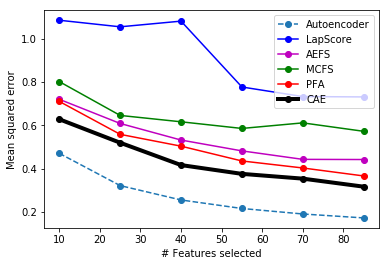

In [11]:
## ISOLET MSE

import json
import matplotlib.pyplot as plt

d = json.load(open('figures/0_isolet.json', 'r'))
e = {}
for alg, results in d.items():
    print(alg)
    for metric, rr in results.items():
        if metric == 'MSE':
            e[alg] = ([int(num) for num, _ in rr.items()], [mse for _, mse in rr.items()])
print(e)

plt.figure(112)
#plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.plot(e['autoencoder'][0], e['autoencoder'][1], '--o', label = 'Autoencoder')
plt.plot(e['lap_ours'][0], e['lap_ours'][1], 'b-o', label = 'LapScore')
plt.plot(e['AEFS'][0], e['AEFS'][1], 'm-o', label = 'AEFS')
#plt.plot(e['udfs_ours'][0], e['udfs_ours'][1], 'b-o', label = 'UDFS')
plt.plot(e['mcfs_ours'][0], e['mcfs_ours'][1], 'g-o', label = 'MCFS')
plt.plot(e['pfa_transform'][0], e['pfa_transform'][1], 'r-o', label = 'PFA')
#plt.plot(e['random_transform'][0], e['random_transform'][1], 'y-o', label = 'Random')
plt.plot(e['concrete_column_subset_selector_general'][0], e['concrete_column_subset_selector_general'][1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Mean squared error')
plt.savefig('figures/isolet_MSE_worandom.pdf', transparent = True)

pca_extractor
autoencoder
lap_ours
AEFS
concrete_column_subset_selector_general
mcfs_ours
pfa_transform
random_transform
{'pca_extractor': ([10, 25, 40, 55, 70, 85], [0.024699300527572632, 0.01795216090977192, 0.01476645190268755, 0.01292209979146719, 0.011614682152867317, 0.010633655823767185]), 'autoencoder': ([10, 25, 40, 55, 70, 85], [0.02548076957464218, 0.01843632571399212, 0.015354459173977375, 0.013671287335455418, 0.012273916974663734, 0.01150352880358696]), 'lap_ours': ([10, 25, 40, 55, 70, 85], [0.205457404255867, 0.30500975251197815, 0.2809114456176758, 0.2846183180809021, 0.33324292302131653, 0.34911948442459106]), 'AEFS': ([10, 25, 40, 55, 70, 85], [0.15833032131195068, 0.26734304428100586, 0.1443312019109726, 0.17183972895145416, 0.2714711129665375, 0.14652150869369507]), 'concrete_column_subset_selector_general': ([10, 25, 40, 55, 70, 85], [0.13530652225017548, 0.1239662766456604, 0.11528702825307846, 0.1369984745979309, 0.1263473778963089, 0.12180326879024506]), 'mcfs_

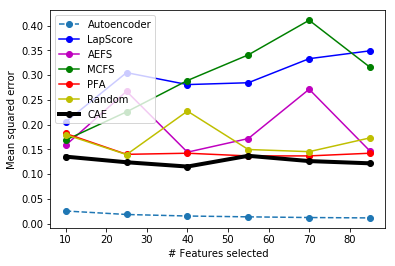

In [47]:
## FASHION MSE

import json
import matplotlib.pyplot as plt

d = json.load(open('figures/0_fashion.json', 'r'))
e = {}
for alg, results in d.items():
    print(alg)
    for metric, rr in results.items():
        if metric == 'MSE':
            e[alg] = ([int(num) for num, _ in rr.items()], [mse for _, mse in rr.items()])
print(e)

plt.figure(112)
#plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.plot(e['autoencoder'][0], e['autoencoder'][1], '--o', label = 'Autoencoder')
plt.plot(e['lap_ours'][0], e['lap_ours'][1], 'b-o', label = 'LapScore')
plt.plot(e['AEFS'][0], e['AEFS'][1], 'm-o', label = 'AEFS')
#plt.plot(e['udfs_ours'][0], e['udfs_ours'][1], 'c-o', label = 'UDFS')
plt.plot(e['mcfs_ours'][0], e['mcfs_ours'][1], 'g-o', label = 'MCFS')
plt.plot(e['pfa_transform'][0], e['pfa_transform'][1], 'r-o', label = 'PFA')
plt.plot(e['random_transform'][0], e['random_transform'][1], 'y-o', label = 'Random')
plt.plot(e['concrete_column_subset_selector_general'][0], e['concrete_column_subset_selector_general'][1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Mean squared error')
plt.savefig('figures/fashion_MSE.pdf', transparent = True)

pca_extractor
autoencoder
lap_ours
AEFS
concrete_column_subset_selector_general
mcfs_ours
pfa_transform
random_transform
{'pca_extractor': ([10, 25, 40, 55, 70, 85], [0.7350865939704939, 0.8704297626683771, 0.8896728672225785, 0.8928800513149455, 0.8896728672225785, 0.8851828094932649]), 'autoencoder': ([10, 25, 40, 55, 70, 85], [0.8511866581141757, 0.8762026940346376, 0.8710711994868505, 0.8588838999358563, 0.8569595894804362, 0.8492623476587556]), 'lap_ours': ([10, 25, 40, 55, 70, 85], [0.1468890314304041, 0.1892238614496472, 0.2610647851186658, 0.43361128928800513, 0.477228992944195, 0.5253367543296985]), 'AEFS': ([10, 25, 40, 55, 70, 85], [0.28223220012828737, 0.4079538165490699, 0.5355997434252726, 0.5368826170622194, 0.6080821039127646, 0.6266837716484926]), 'concrete_column_subset_selector_general': ([10, 25, 40, 55, 70, 85], [0.354073123797306, 0.5586914688903143, 0.6792815907633099, 0.704939063502245, 0.7196921103271328, 0.7190506735086594]), 'mcfs_ours': ([10, 25, 40, 55, 70,

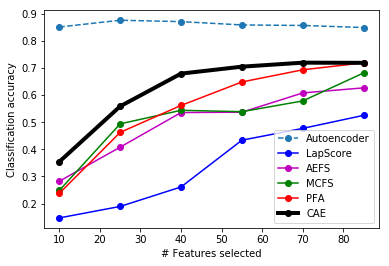

In [15]:
## ISOLET CLASSDT

import json
import matplotlib.pyplot as plt

d = json.load(open('figures/0_isolet.json', 'r'))
e = {}
for alg, results in d.items():
    print(alg)
    for metric, rr in results.items():
        if metric == 'CLASSDT':
            e[alg] = ([int(num) for num, _ in rr.items()], [mse for _, mse in rr.items()])
print(e)

plt.figure(112)
#plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.plot(e['autoencoder'][0], e['autoencoder'][1], '--o', label = 'Autoencoder')
plt.plot(e['lap_ours'][0], e['lap_ours'][1], 'b-o', label = 'LapScore')
plt.plot(e['AEFS'][0], e['AEFS'][1], 'm-o', label = 'AEFS')
#plt.plot(e['udfs_ours'][0], e['udfs_ours'][1], 'b-o', label = 'UDFS')
plt.plot(e['mcfs_ours'][0], e['mcfs_ours'][1], 'g-o', label = 'MCFS')
plt.plot(e['pfa_transform'][0], e['pfa_transform'][1], 'r-o', label = 'PFA')
#plt.plot(e['random_transform'][0], e['random_transform'][1], 'y-o', label = 'Random')
plt.plot(e['concrete_column_subset_selector_general'][0], e['concrete_column_subset_selector_general'][1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.savefig('figures/isolet_CLASSDT_worandom.pdf', transparent = True)

pca_extractor
autoencoder
lap_ours
AEFS
concrete_column_subset_selector_general
mcfs_ours
pfa_transform
random_transform
{'pca_extractor': ([10, 25, 40, 55, 70, 85], [0.789, 0.821, 0.8243333333333334, 0.8228333333333333, 0.8263333333333334, 0.8196666666666667]), 'autoencoder': ([10, 25, 40, 55, 70, 85], [0.8056666666666666, 0.8175, 0.8256666666666667, 0.8108333333333333, 0.8163333333333334, 0.8093333333333333]), 'lap_ours': ([10, 25, 40, 55, 70, 85], [0.26766666666666666, 0.41433333333333333, 0.5336666666666666, 0.5723333333333334, 0.5663333333333334, 0.5206666666666667]), 'AEFS': ([10, 25, 40, 55, 70, 85], [0.3745, 0.53, 0.6096666666666667, 0.6233333333333333, 0.6571666666666667, 0.7065]), 'concrete_column_subset_selector_general': ([10, 25, 40, 55, 70, 85], [0.4445, 0.66, 0.6808333333333333, 0.6341666666666667, 0.6785, 0.7465]), 'mcfs_ours': ([10, 25, 40, 55, 70, 85], [0.4071666666666667, 0.45366666666666666, 0.4425, 0.469, 0.5208333333333334, 0.5563333333333333]), 'pfa_transform': (

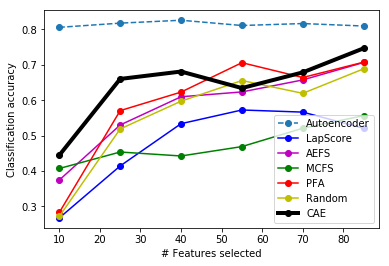

In [48]:
## ISOLET CLASSDT

import json
import matplotlib.pyplot as plt

d = json.load(open('figures/0_fashion.json', 'r'))
e = {}
for alg, results in d.items():
    print(alg)
    for metric, rr in results.items():
        if metric == 'CLASSDT':
            e[alg] = ([int(num) for num, _ in rr.items()], [mse for _, mse in rr.items()])
print(e)

plt.figure(112)
#plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.plot(e['autoencoder'][0], e['autoencoder'][1], '--o', label = 'Autoencoder')
plt.plot(e['lap_ours'][0], e['lap_ours'][1], 'b-o', label = 'LapScore')
plt.plot(e['AEFS'][0], e['AEFS'][1], 'm-o', label = 'AEFS')
#plt.plot(e['udfs_ours'][0], e['udfs_ours'][1], 'b-o', label = 'UDFS')
plt.plot(e['mcfs_ours'][0], e['mcfs_ours'][1], 'g-o', label = 'MCFS')
plt.plot(e['pfa_transform'][0], e['pfa_transform'][1], 'r-o', label = 'PFA')
plt.plot(e['random_transform'][0], e['random_transform'][1], 'y-o', label = 'Random')
plt.plot(e['concrete_column_subset_selector_general'][0], e['concrete_column_subset_selector_general'][1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.savefig('figures/fashion_CLASSDT.pdf', transparent = True)

In [ ]:
## ISOLET CLASS

import json
import matplotlib.pyplot as plt

d = json.load(open('figures/0_isolet.json', 'r'))
e = {}
for alg, results in d.items():
    print(alg)
    for metric, rr in results.items():
        if metric == 'CLASS':
            e[alg] = ([int(num) for num, _ in rr.items()], [mse for _, mse in rr.items()])
print(e)

plt.figure(112)
#plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.plot(e['autoencoder'][0], e['autoencoder'][1], '--o', label = 'Autoencoder')
plt.plot(e['lap_ours'][0], e['lap_ours'][1], 'b-o', label = 'LapScore')
plt.plot(e['AEFS'][0], e['AEFS'][1], 'm-o', label = 'AEFS')
#plt.plot(e['udfs_ours'][0], e['udfs_ours'][1], 'b-o', label = 'UDFS')
plt.plot(e['mcfs_ours'][0], e['mcfs_ours'][1], 'g-o', label = 'MCFS')
plt.plot(e['pfa_transform'][0], e['pfa_transform'][1], 'r-o', label = 'PFA')
plt.plot(e['random_transform'][0], e['random_transform'][1], 'y-o', label = 'Random')
plt.plot(e['concrete_column_subset_selector_general'][0], e['concrete_column_subset_selector_general'][1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.savefig('figures/isolet_CLASSDT.pdf', transparent = True)

In [9]:
## ISOLET MSELR

import pickle as pkl
import matplotlib.pyplot as plt

concrete = pkl.load(open("2018-12-03_19.46.31.38149785concrete_column_subset_selector_generalMSELR.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-04_05.31.33.45834285udfs_oursMSELR.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-04_05.53.46.70224885mcfs_oursMSELR.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-04_06.00.02.89905085pfa_transformMSELR.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-04_06.06.07.52289785random_transformMSELR.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-03_10.45.04.54572185pca_extractorMSELR.pickle", "rb"))[0].get_data()

plt.figure(112)
plt.plot(udfs[0], udfs[1], 'b-o', label = 'UDFS')
plt.plot(mcfs[0], mcfs[1], 'g-o', label = 'MCFS')
plt.plot(pfa[0], pfa[1], 'r-o', label = 'PFA')
plt.plot(random[0], random[1], 'y-o', label = 'Random')
plt.plot(concrete[0], concrete[1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Mean squared error')
plt.savefig('figures/isolet_mselr.pdf', transparent = True)

AttributeError: module 'ipykernel.pylab.backend_inline' has no attribute 'new_figure_manager_given_figure'

In [ ]:
## ISOLET CLASSDT

import pickle as pkl
import matplotlib.pyplot as plt

concrete = pkl.load(open("2018-12-03_19.46.31.40396185concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-04_05.31.33.46505485udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-04_05.53.46.71230585mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-04_06.00.02.90893285pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-04_06.06.07.54005585random_transformCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-03_10.45.04.58135685pca_extractorCLASSDT.pickle", "rb"))[0].get_data()

plt.figure(112)
plt.plot(udfs[0], udfs[1], 'b-o', label = 'UDFS')
plt.plot(mcfs[0], mcfs[1], 'g-o', label = 'MCFS')
plt.plot(pfa[0], pfa[1], 'r-o', label = 'PFA')
plt.plot(random[0], random[1], 'y-o', label = 'Random')
plt.plot(concrete[0], concrete[1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.plot(pca[0], pca[1], '--o', label = 'PCA upper bound')
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.savefig('figures/isolet_classification.pdf', transparent = True)

In [ ]:
## MNIST-FASHION MSELR

import pickle as pkl
import matplotlib.pyplot as plt

concrete = pkl.load(open("2018-12-13_14.09.27.00785685concrete_column_subset_selector_generalMSELR.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-13_20.44.55.78684785udfs_oursMSELR.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-13_20.54.17.69984685mcfs_oursMSELR.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-13_20.56.02.00462285pfa_transformMSELR.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-13_20.57.36.45479985random_transformMSELR.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-13_12.58.40.68266585pca_extractorMSELR.pickle", "rb"))[0].get_data()

plt.figure(112)
plt.plot(udfs[0], udfs[1], 'b-o', label = 'UDFS')
plt.plot(mcfs[0], mcfs[1], 'g-o', label = 'MCFS')
plt.plot(pfa[0], pfa[1], 'r-o', label = 'PFA')
plt.plot(random[0], random[1], 'y-o', label = 'Random')
plt.plot(concrete[0], concrete[1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.plot(pca[0], pca[1], '--o', label = 'PCA lower bound')
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Mean squared error')
plt.savefig('figures/mnistfashion_mselr.pdf', transparent = True)

In [ ]:
## MNIST-FASHION CLASSDT

import pickle as pkl
import matplotlib.pyplot as plt

concrete = pkl.load(open("2018-12-13_14.09.27.01357085concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-13_20.44.55.79313085udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-13_20.54.17.70764285mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-13_20.56.02.01103585pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-13_20.57.36.46249985random_transformCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-13_12.58.40.70651185pca_extractorCLASSDT.pickle", "rb"))[0].get_data()

plt.figure(112)
plt.plot(udfs[0], udfs[1], 'b-o', label = 'UDFS')
plt.plot(mcfs[0], mcfs[1], 'g-o', label = 'MCFS')
plt.plot(pfa[0], pfa[1], 'r-o', label = 'PFA')
plt.plot(random[0], random[1], 'y-o', label = 'Random')
plt.plot(concrete[0], concrete[1], 'k-o', label = 'CAE', linewidth = 4.0)
plt.plot(pca[0], pca[1], '--o', label = 'PCA upper bound')
plt.legend(loc = 'best')
plt.xlabel('# Features selected')
plt.ylabel('Classification accuracy')
plt.savefig('figures/mnistfashion_classification.pdf', transparent = True)

In [ ]:
## EPILEPTIC FOR K=50 MSELR

import pickle as pkl

concrete = pkl.load(open("2018-12-16_04.37.38.24043850concrete_column_subset_selector_generalMSELR.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_06.48.51.98753550udfs_oursMSELR.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_06.51.16.91063550mcfs_oursMSELR.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_06.51.34.15317650pfa_transformMSELR.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_06.51.52.48816750random_transformMSELR.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_04.15.16.31304750pca_extractorMSELR.pickle", "rb"))[0].get_data()
aefs = pkl.load(open("2018-12-16_04.14.57.13954750AEFSMSELR.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])

In [ ]:
## EPILEPTIC FOR K=50 CLASSDT

import pickle as pkl

concrete = pkl.load(open("2018-12-16_04.37.38.24917650concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_06.48.51.99383950udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_06.51.16.91692350mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_06.51.34.15997050pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_06.51.52.49466950random_transformCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_04.15.16.32172150pca_extractorCLASSDT.pickle", "rb"))[0].get_data()
aefs = pkl.load(open("2018-12-16_04.14.57.16091150AEFSCLASSDT.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])

In [ ]:
## MNIST FOR K=50 MSELR

import pickle as pkl

aefs = pkl.load(open("2018-12-16_06.56.23.37245350AEFSMSELR.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_06.56.48.61940750pca_extractorMSELR.pickle", "rb"))[0].get_data()
concrete = pkl.load(open("2018-12-16_07.14.15.18591950concrete_column_subset_selector_generalMSELR.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_08.15.39.07854750udfs_oursMSELR.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_08.16.49.01764050mcfs_oursMSELR.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_08.17.06.57377650pfa_transformMSELR.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_08.17.21.66980150random_transformMSELR.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])

In [ ]:
## MNIST FOR K=50 CLASSDT

import pickle as pkl

aefs = pkl.load(open("2018-12-16_06.56.23.38453450AEFSCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_06.56.48.63152650pca_extractorCLASSDT.pickle", "rb"))[0].get_data()
concrete = pkl.load(open("2018-12-16_07.14.15.19822850concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_08.15.39.09093550udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_08.16.49.03000050mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_08.17.06.58633050pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_08.17.21.68244750random_transformCLASSDT.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])

In [ ]:
## MNIST-FASHION FOR K=50 MSELR


In [ ]:
## MNIST-FASHION FOR K=50 CLASSDT

import pickle as pkl

aefs = pkl.load(open("2018-12-16_08.22.14.32377450AEFSCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_08.22.38.17986450pca_extractorCLASSDT.pickle", "rb"))[0].get_data()
concrete = pkl.load(open("2018-12-16_08.45.12.69362750concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_09.43.48.32016050udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_09.44.52.99573650mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_09.45.08.59966150pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_09.45.19.40009250random_transformCLASSDT.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])

In [ ]:
## ISOLET FOR K=50 MSELR

In [ ]:
## ISOLET FOR K=50 CLASSDT

import pickle as pkl

aefs = pkl.load(open("2018-12-16_09.50.57.52154850AEFSCLASSDT.pickle", "rb"))[0].get_data()
pca = pkl.load(open("2018-12-16_09.51.21.64084950pca_extractorCLASSDT.pickle", "rb"))[0].get_data()
concrete = pkl.load(open("2018-12-16_10.13.51.27660150concrete_column_subset_selector_generalCLASSDT.pickle", "rb"))[0].get_data()
udfs = pkl.load(open("2018-12-16_11.17.10.30865450udfs_oursCLASSDT.pickle", "rb"))[0].get_data()
mcfs = pkl.load(open("2018-12-16_11.18.33.76964450mcfs_oursCLASSDT.pickle", "rb"))[0].get_data()
pfa = pkl.load(open("2018-12-16_11.18.59.68581250pfa_transformCLASSDT.pickle", "rb"))[0].get_data()
random = pkl.load(open("2018-12-16_11.19.25.83652250random_transformCLASSDT.pickle", "rb"))[0].get_data()

print(concrete[1][0], udfs[1][0], mcfs[1][0], pfa[1][0], random[1][0], pca[1][0], aefs[1][0])